In [1]:
!pip install --upgrade --force-reinstall numpy pandas scipy
!pip install catboost lightautoml autogluon --upgrade --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 733.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 584.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uni

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.5 MB/s eta 0:00:00
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as fgr
from matplotlib.pyplot import figure
import seaborn as sns
import time
import os

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler, MaxAbsScaler, LabelEncoder, OneHotEncoder, PowerTransformer
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, RepeatedKFold, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import pylab
from scipy.stats import skew

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
import os
import pandas as pd

# Инициализация списков
train_files = []
test_files = []

# Поиск файлов в текущей директории
for filename in os.listdir('/content'):
    if filename.endswith('-training.parquet'):
        train_files.append(os.path.join('/content', filename))
    elif filename.endswith('-testing.parquet'):
        test_files.append(os.path.join('/content', filename))

# Загрузка и объединение train-файлов
train_df = pd.concat([pd.read_parquet(file) for file in train_files])

# Загрузка и объединение test-файлов
test_df = pd.concat([pd.read_parquet(file) for file in test_files])

# Проверка размеров
print(f"Train data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Train data shape: (125170, 78)
Test data shape: (306201, 78)


In [3]:
train_df.head()

Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         6            105                  2                       2   
1         6              1                  2                       0   
2         6       55295858                  8                       0   
3         6             49                  2                       0   
4         6            109                  2                       2   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                      12.0                      12.0                    6.0   
1                      12.0                       0.0                    6.0   
2                      48.0                       0.0                    6.0   
3                      12.0                       0.0                    6.0   
4                      12.0                      12.0                    6.0   

   Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  ...  \
0                    6.0                     6.0                    0.0  ...   
1                    6.0                     6.0                    0.0  ...   
2                    6.0                     6.0                    0.0  ...   
3                    6.0                     6.0                    0.0  ...   
4                    6.0                     6.0                    0.0  ...   

   Fwd Seg Size Min  Active Mean  Active Std  Active Max  Active Min  \
0                20          0.0         0.0         0.0         0.0   
1                20          0.0         0.0         0.0         0.0   
2                20          1.0         0.0         1.0         1.0   
3                20          0.0         0.0         0.0         0.0   
4                20          0.0         0.0         0.0         0.0   

    Idle Mean   Idle Std    Idle Max    Idle Min  Label  
0         0.0        0.0         0.0         0.0    Syn  
1         0.0        0.0         0.0         0.0    Syn  
2  18431952.0  4641289.0  22000140.0  13184826.0    Syn  
3         0.0        0.0         0.0         0.0    Syn  
4         0.0        0.0         0.0         0.0    Syn  

[5 rows x 78 columns]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125170 entries, 0 to 17769
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  125170 non-null  int8   
 1   Flow Duration             125170 non-null  int32  
 2   Total Fwd Packets         125170 non-null  int32  
 3   Total Backward Packets    125170 non-null  int16  
 4   Fwd Packets Length Total  125170 non-null  float32
 5   Bwd Packets Length Total  125170 non-null  float32
 6   Fwd Packet Length Max     125170 non-null  float32
 7   Fwd Packet Length Min     125170 non-null  float32
 8   Fwd Packet Length Mean    125170 non-null  float32
 9   Fwd Packet Length Std     125170 non-null  float32
 10  Bwd Packet Length Max     125170 non-null  float32
 11  Bwd Packet Length Min     125170 non-null  float32
 12  Bwd Packet Length Mean    125170 non-null  float32
 13  Bwd Packet Length Std     125170 non-null  float32

In [ ]:
train_df.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_cat]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_cat: {len(cat_but_cat)}')

    return cat_cols, num_cols, cat_but_cat


cat_cols, num_cols, cat_but_cat, = grab_col_names(train_df)
cat_cols, num_cols, cat_but_cat

Observations: 125170
Variables: 78
cat_cols: 20
num_cols: 58
cat_but_cat: 0


(['Label',
  'Protocol',
  'Fwd PSH Flags',
  'Bwd PSH Flags',
  'Fwd URG Flags',
  'Bwd URG Flags',
  'FIN Flag Count',
  'SYN Flag Count',
  'RST Flag Count',
  'PSH Flag Count',
  'ACK Flag Count',
  'URG Flag Count',
  'CWE Flag Count',
  'ECE Flag Count',
  'Fwd Avg Bytes/Bulk',
  'Fwd Avg Packets/Bulk',
  'Fwd Avg Bulk Rate',
  'Bwd Avg Bytes/Bulk',
  'Bwd Avg Packets/Bulk',
  'Bwd Avg Bulk Rate'],
 ['Flow Duration',
  'Total Fwd Packets',
  'Total Backward Packets',
  'Fwd Packets Length Total',
  'Bwd Packets Length Total',
  'Fwd Packet Length Max',
  'Fwd Packet Length Min',
  'Fwd Packet Length Mean',
  'Fwd Packet Length Std',
  'Bwd Packet Length Max',
  'Bwd Packet Length Min',
  'Bwd Packet Length Mean',
  'Bwd Packet Length Std',
  'Flow Bytes/s',
  'Flow Packets/s',
  'Flow IAT Mean',
  'Flow IAT Std',
  'Flow IAT Max',
  'Flow IAT Min',
  'Fwd IAT Total',
  'Fwd IAT Mean',
  'Fwd IAT Std',
  'Fwd IAT Max',
  'Fwd IAT Min',
  'Bwd IAT Total',
  'Bwd IAT Mean',
  'Bwd I

In [ ]:
for i in cat_cols:
    print(i, train_df[i].unique())

Label ['NetBIOS' 'Benign' 'Syn' 'UDP' 'MSSQL' 'UDPLag' 'LDAP' 'Portmap']
Protocol [17  6  0]
Fwd PSH Flags [0 1]
Bwd PSH Flags [0]
Fwd URG Flags [0]
Bwd URG Flags [0]
FIN Flag Count [0]
SYN Flag Count [0 1]
RST Flag Count [0 1]
PSH Flag Count [0]
ACK Flag Count [0 1]
URG Flag Count [0 1]
CWE Flag Count [0 1]
ECE Flag Count [0]
Fwd Avg Bytes/Bulk [0]
Fwd Avg Packets/Bulk [0]
Fwd Avg Bulk Rate [0]
Bwd Avg Bytes/Bulk [0]
Bwd Avg Packets/Bulk [0]
Bwd Avg Bulk Rate [0]


In [ ]:
for i in train_df.columns:
    print(i, train_df[i].isnull().sum())

Protocol 0
Flow Duration 0
Total Fwd Packets 0
Total Backward Packets 0
Fwd Packets Length Total 0
Bwd Packets Length Total 0
Fwd Packet Length Max 0
Fwd Packet Length Min 0
Fwd Packet Length Mean 0
Fwd Packet Length Std 0
Bwd Packet Length Max 0
Bwd Packet Length Min 0
Bwd Packet Length Mean 0
Bwd Packet Length Std 0
Flow Bytes/s 0
Flow Packets/s 0
Flow IAT Mean 0
Flow IAT Std 0
Flow IAT Max 0
Flow IAT Min 0
Fwd IAT Total 0
Fwd IAT Mean 0
Fwd IAT Std 0
Fwd IAT Max 0
Fwd IAT Min 0
Bwd IAT Total 0
Bwd IAT Mean 0
Bwd IAT Std 0
Bwd IAT Max 0
Bwd IAT Min 0
Fwd PSH Flags 0
Bwd PSH Flags 0
Fwd URG Flags 0
Bwd URG Flags 0
Fwd Header Length 0
Bwd Header Length 0
Fwd Packets/s 0
Bwd Packets/s 0
Packet Length Min 0
Packet Length Max 0
Packet Length Mean 0
Packet Length Std 0
Packet Length Variance 0
FIN Flag Count 0
SYN Flag Count 0
RST Flag Count 0
PSH Flag Count 0
ACK Flag Count 0
URG Flag Count 0
CWE Flag Count 0
ECE Flag Count 0
Down/Up Ratio 0
Avg Packet Size 0
Avg Fwd Segment Size 0
Avg Bw

         Label      Ratio
Label                    
Syn      48840  39.018934
Benign   46427  37.091156
UDP      18090  14.452345
MSSQL     8523   6.809140
LDAP      1906   1.522729
Portmap    685   0.547256
NetBIOS    644   0.514500
UDPLag      55   0.043940


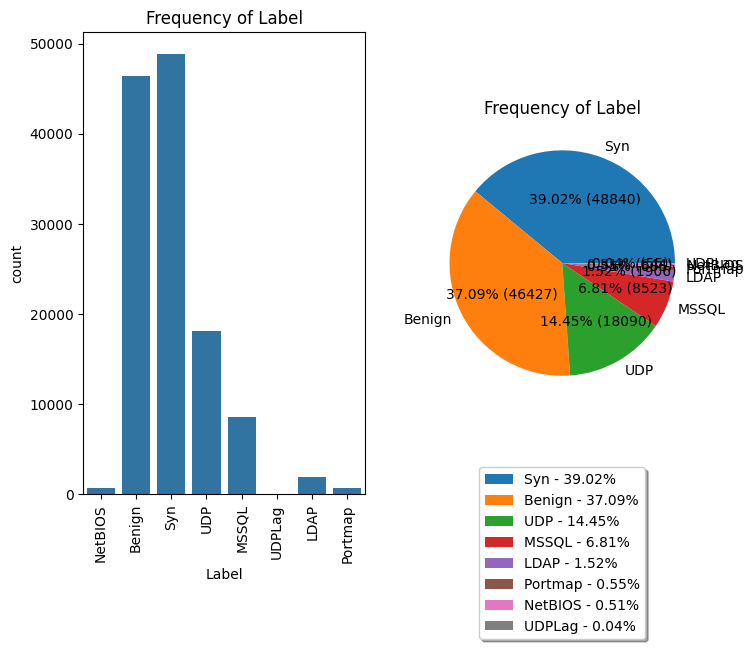

          Protocol      Ratio
Protocol                     
6            79530  63.537589
17           44814  35.802509
0              826   0.659903


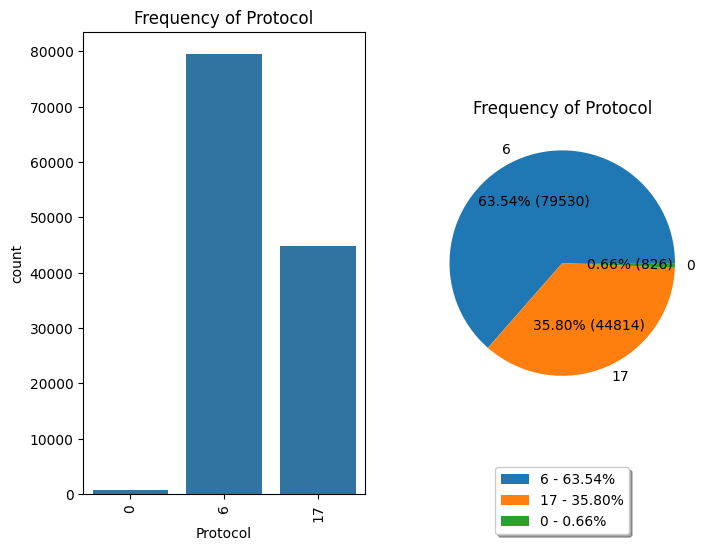

               Fwd PSH Flags     Ratio
Fwd PSH Flags                         
0                     118967  95.04434
1                       6203   4.95566


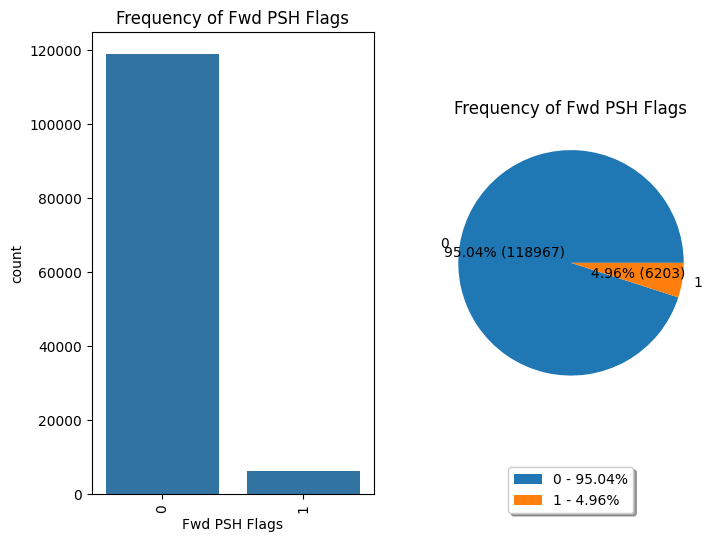

               Bwd PSH Flags  Ratio
Bwd PSH Flags                      
0                     125170  100.0


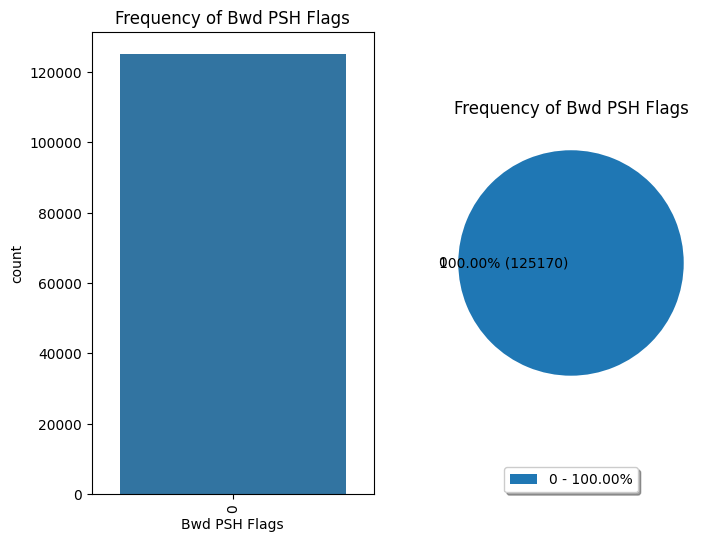

               Fwd URG Flags  Ratio
Fwd URG Flags                      
0                     125170  100.0


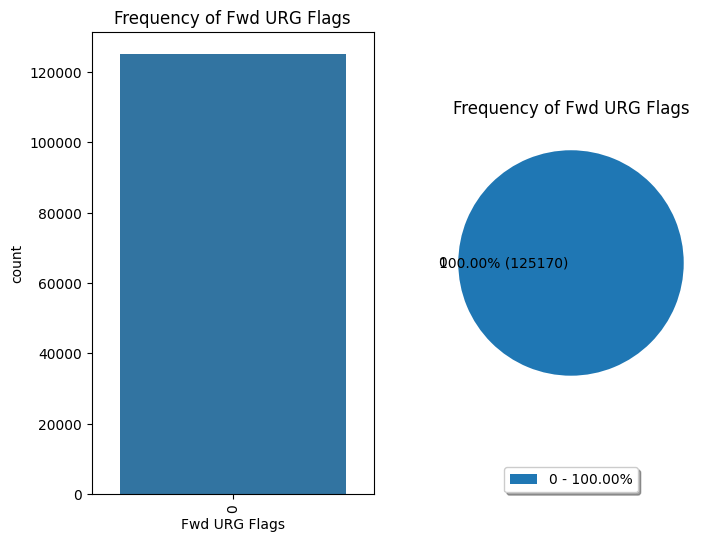

               Bwd URG Flags  Ratio
Bwd URG Flags                      
0                     125170  100.0


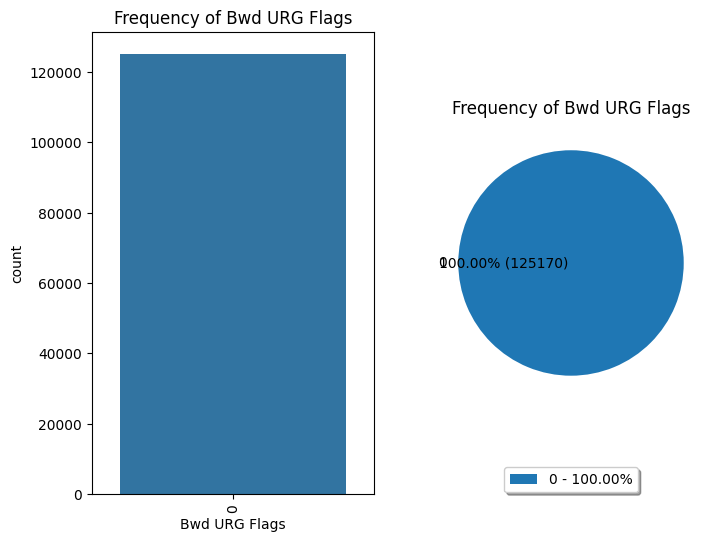

                FIN Flag Count  Ratio
FIN Flag Count                       
0                       125170  100.0


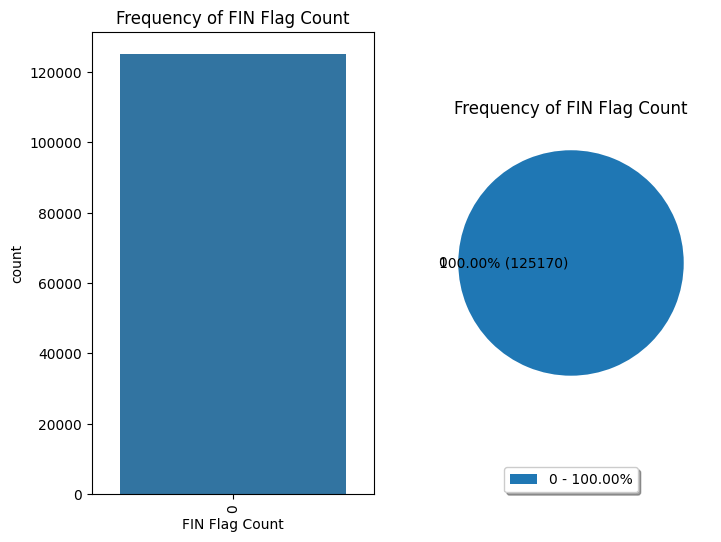

                SYN Flag Count      Ratio
SYN Flag Count                           
0                       125042  99.897739
1                          128   0.102261


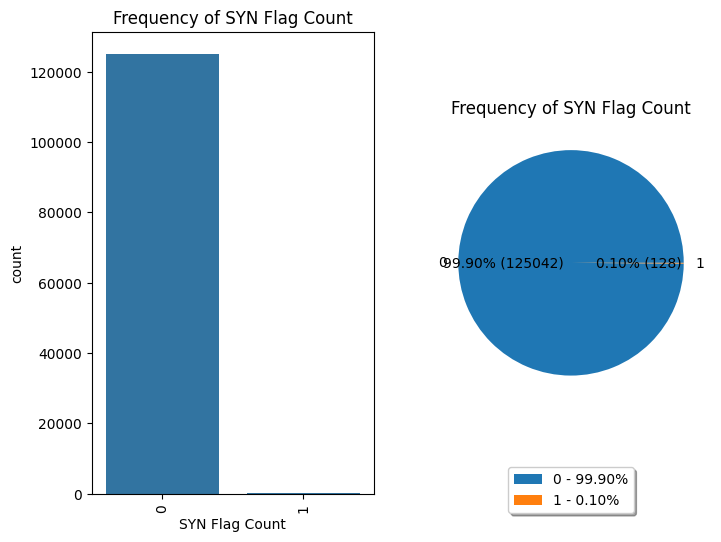

                RST Flag Count     Ratio
RST Flag Count                          
0                       118967  95.04434
1                         6203   4.95566


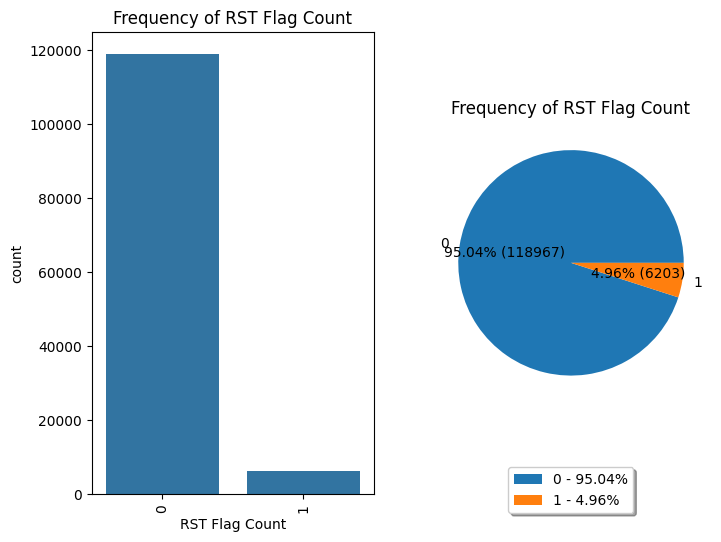

                PSH Flag Count  Ratio
PSH Flag Count                       
0                       125170  100.0


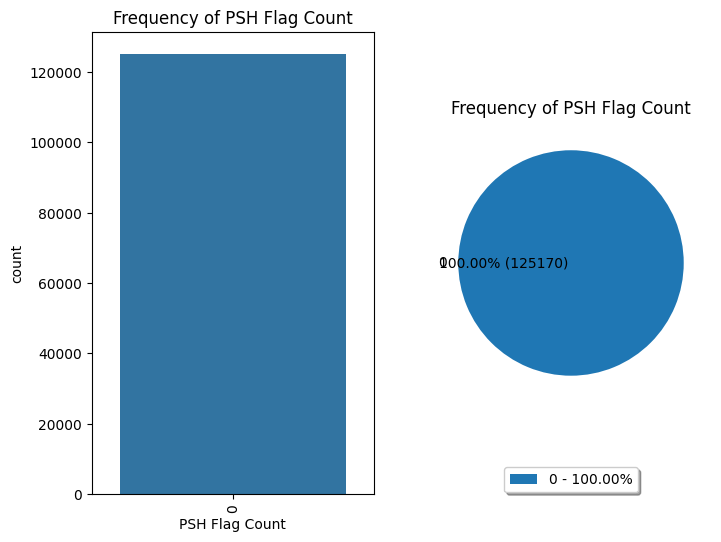

                ACK Flag Count      Ratio
ACK Flag Count                           
0                        66222  52.905648
1                        58948  47.094352


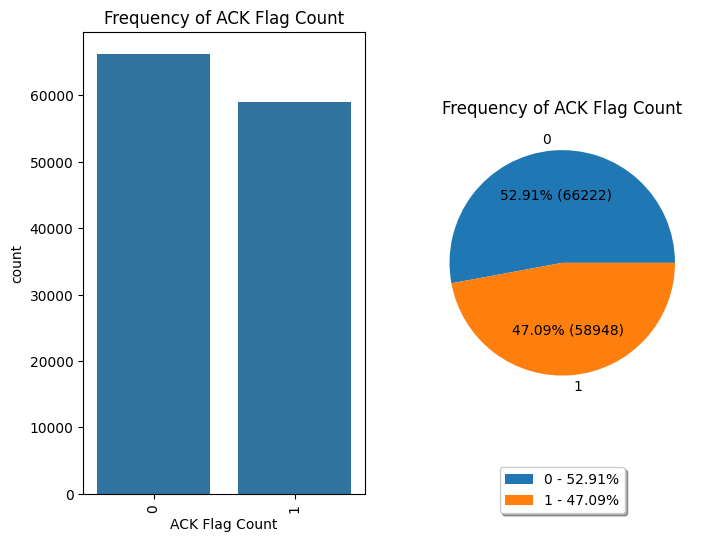

                URG Flag Count      Ratio
URG Flag Count                           
0                       104592  83.559958
1                        20578  16.440042


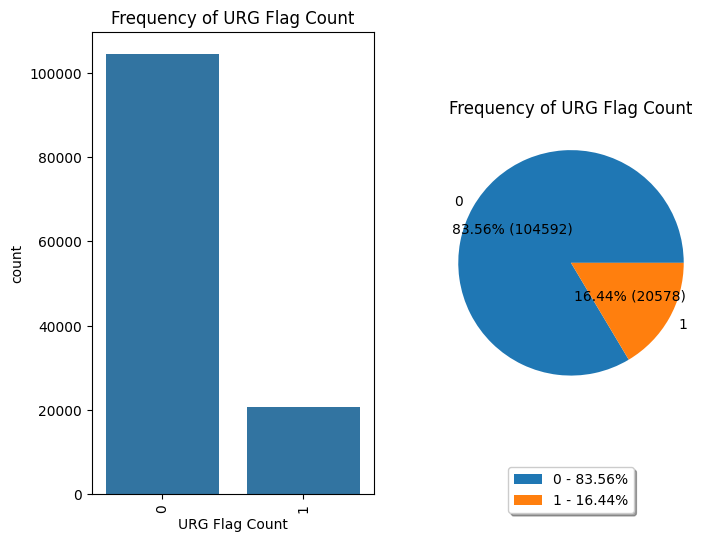

                CWE Flag Count      Ratio
CWE Flag Count                           
0                       114878  91.777582
1                        10292   8.222418


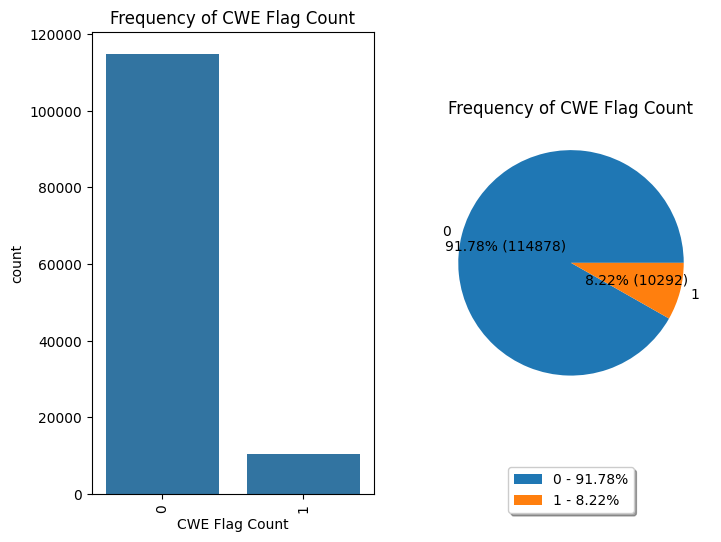

                ECE Flag Count  Ratio
ECE Flag Count                       
0                       125170  100.0


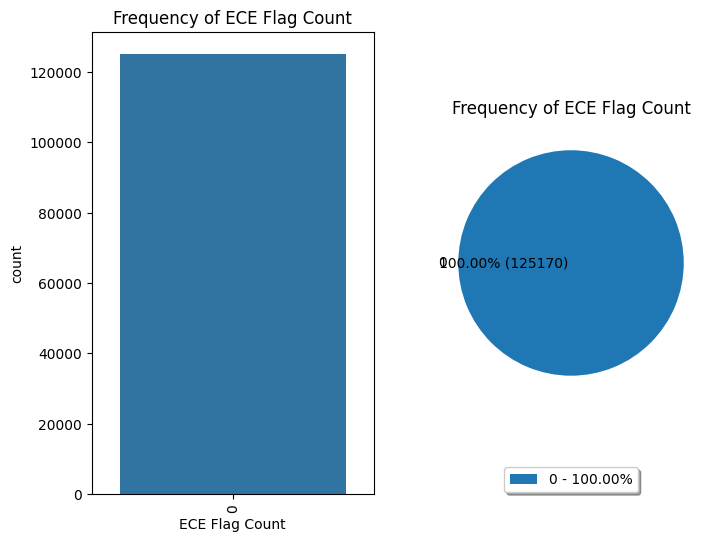

                    Fwd Avg Bytes/Bulk  Ratio
Fwd Avg Bytes/Bulk                           
0                               125170  100.0


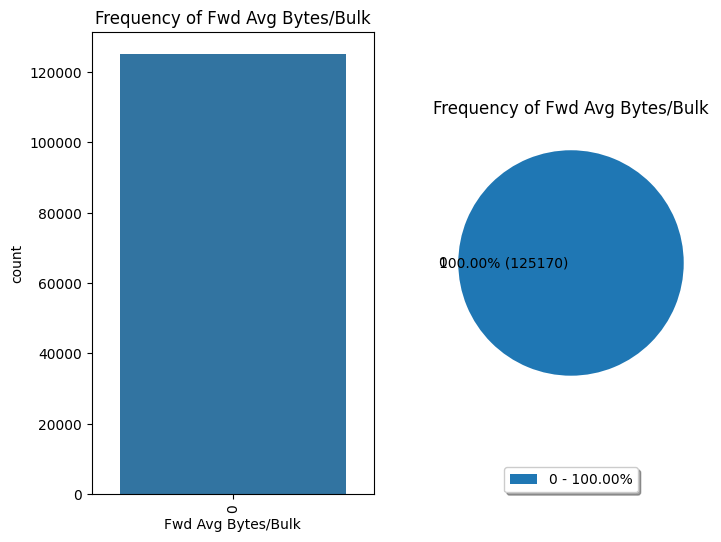

                      Fwd Avg Packets/Bulk  Ratio
Fwd Avg Packets/Bulk                             
0                                   125170  100.0


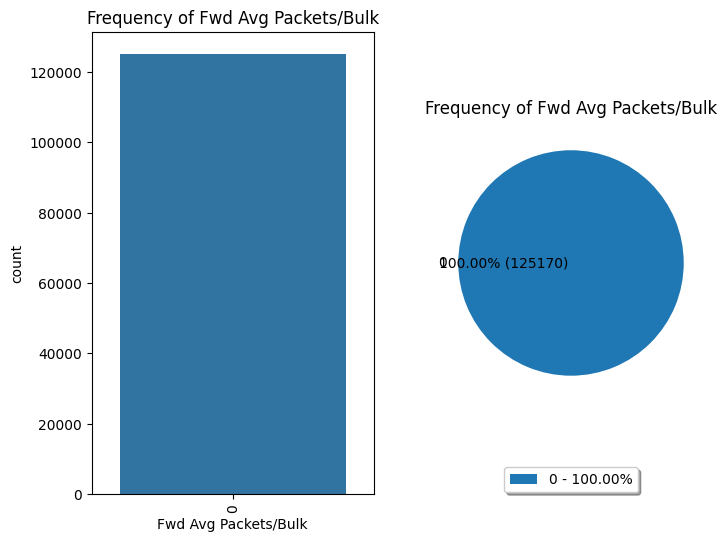

                   Fwd Avg Bulk Rate  Ratio
Fwd Avg Bulk Rate                          
0                             125170  100.0


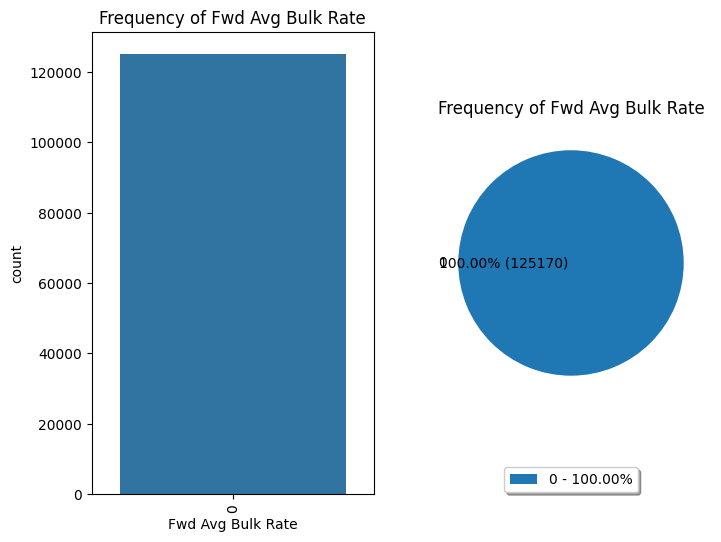

                    Bwd Avg Bytes/Bulk  Ratio
Bwd Avg Bytes/Bulk                           
0                               125170  100.0


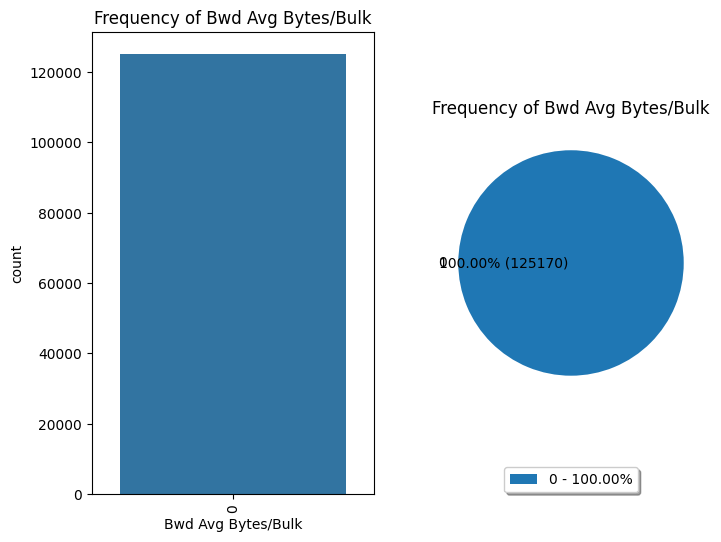

                      Bwd Avg Packets/Bulk  Ratio
Bwd Avg Packets/Bulk                             
0                                   125170  100.0


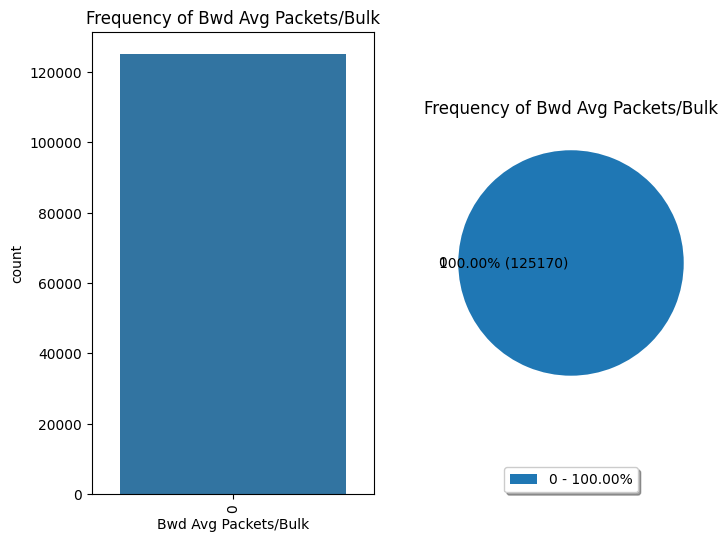

                   Bwd Avg Bulk Rate  Ratio
Bwd Avg Bulk Rate                          
0                             125170  100.0


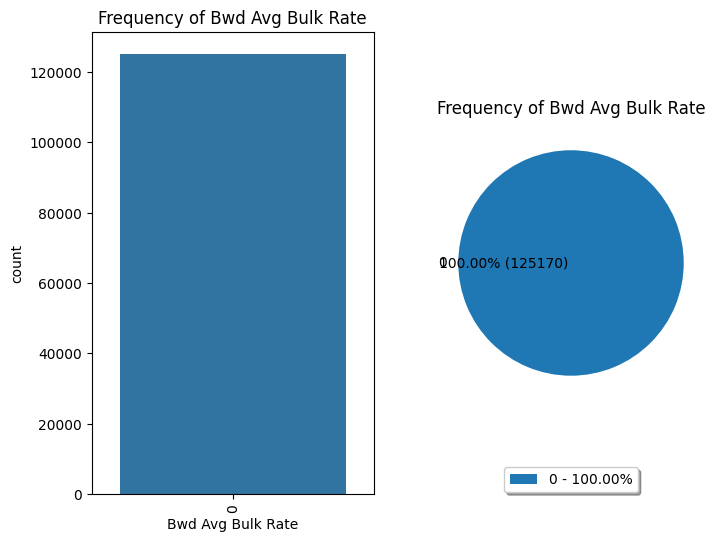

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(train_df, col, True)

In [ ]:
def my_histplot(df, col, ax):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram Plot of {col}')
def my_distplot(df, col, ax):
    sns.distplot(df[col], ax=ax)
    ax.set_title(f'Distribution Plot of {col}')
def my_kdeplot(df, col, ax):
    sns.kdeplot(df[col], ax=ax, fill=True)
    ax.set_title(f'KDE Plot of {col}')

def my_scatterplot(df, col, ax):
    sns.scatterplot(df[col], ax=ax)
    ax.set_title(f'Scatter Plot of {col}')
def my_lineplot(df, col, ax):
    sns.lineplot(df[col], ax=ax)
    ax.set_title(f'Line Plot of {col}')

def my_pie_chart(df, col, ax):
    labels = df[col].value_counts()
    ax.pie(labels, labels=labels.index, autopct='%1.1f%%')
    ax.set_title(f'Pie Chart of {col}')
def my_countplot(df, col, ax):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
def my_boxplot(df, col, ax):
    sns.boxplot(y=df[col], ax=ax)
def my_violinplot(df, col, ax):
    sns.violinplot(y=df[col], ax=ax)

def my_heatmap(df, size):
    if size: plt.figure(figsize=size)
    sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='Blues', annot_kws={"size": 12})
    plt.title('Correlation Heatmap')
    plt.show()

def my_vsplot(df, normal_col, label_col):
    plt.figure(figsize=(10, 6), dpi=80)
    plt.bar(list(dict(df[normal_col].value_counts()).keys()), dict(df[normal_col].value_counts()).values(), color='r')
    plt.bar(list(dict(df[normal_col][df[label_col] == 1].value_counts()).keys()), dict(df[normal_col][df[label_col] == 1].value_counts()).values(), color='b')

    plt.xlabel(normal_col)
    plt.ylabel('Count')
    plt.legend(['All', label_col])

def plot_charts_grid_single_feature(df, plot_func, size=(12, 4), n_col=1):
    if len(df.columns) == 0:
        return
    n_rows = (len(df.columns) + n_col-1) // n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(size[0]*n_col, size[1]*n_rows))
    if len(df.columns) == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    for i, label in enumerate(df.columns):
        plot_func(df, label, axes[i])
        axes[i].set_xlabel(label)

    for j in range(i+1, n_rows*n_col):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

<ipython-input-7-d91106ae9882>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
<ipython-input-7-d91106ae9882>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
<ipython-input-7-d91106ae9882>:6: UserWarning: 

`distplot` is a deprecated function and will be removed

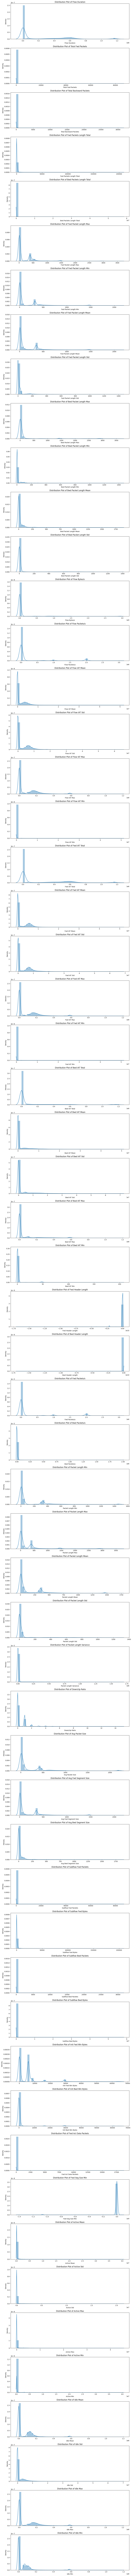

In [ ]:
plot_charts_grid_single_feature(train_df[num_cols], my_distplot)

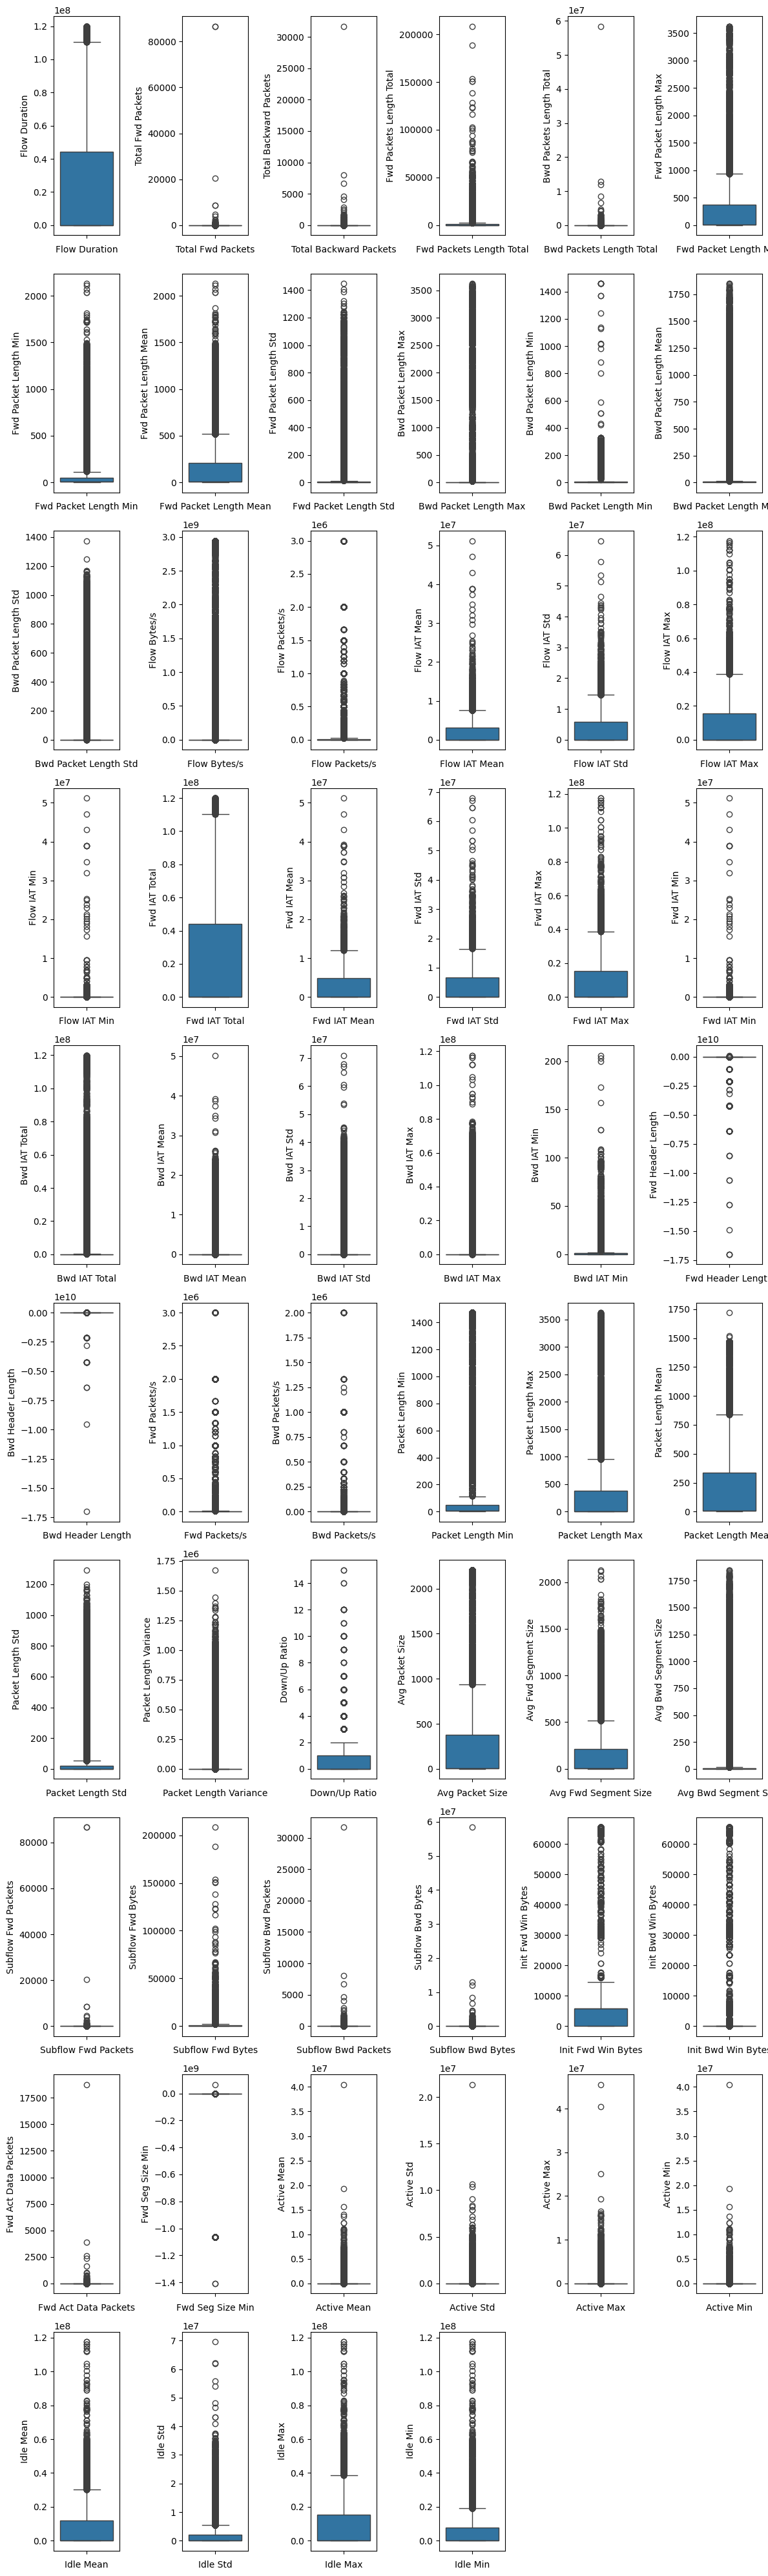

In [ ]:
plot_charts_grid_single_feature(train_df[num_cols], my_boxplot, size=(2, 4), n_col=6)

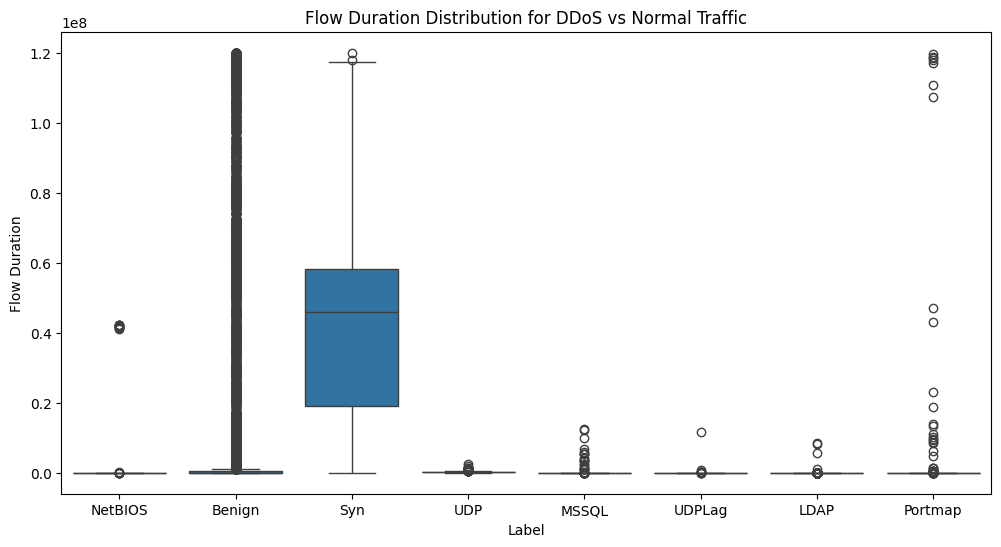

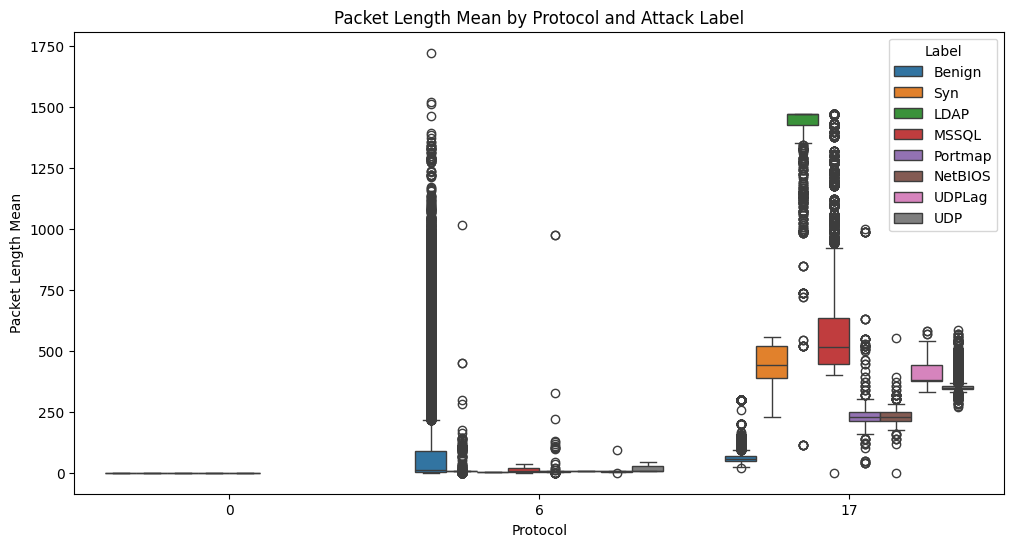

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Flow Duration', data=train_df)
plt.title('Flow Duration Distribution for DDoS vs Normal Traffic')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Protocol', y='Packet Length Mean', hue='Label', data=train_df)
plt.title('Packet Length Mean by Protocol and Attack Label')
plt.show()

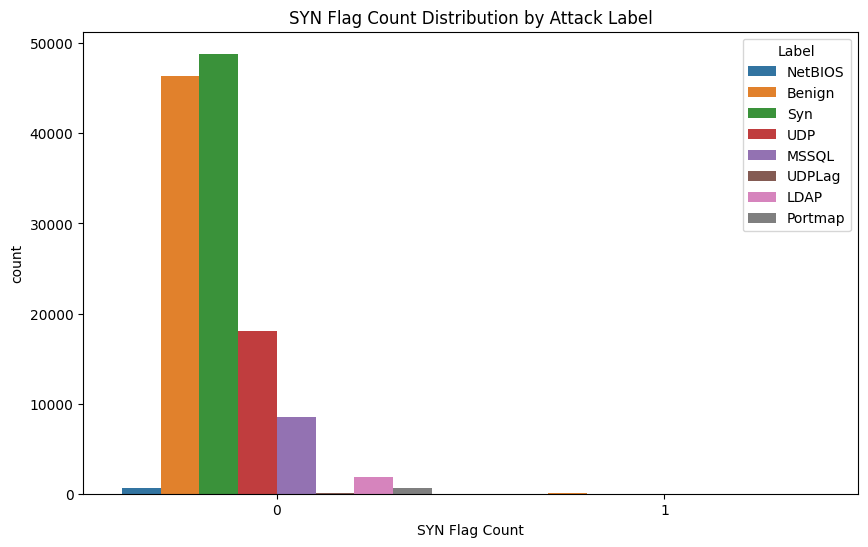

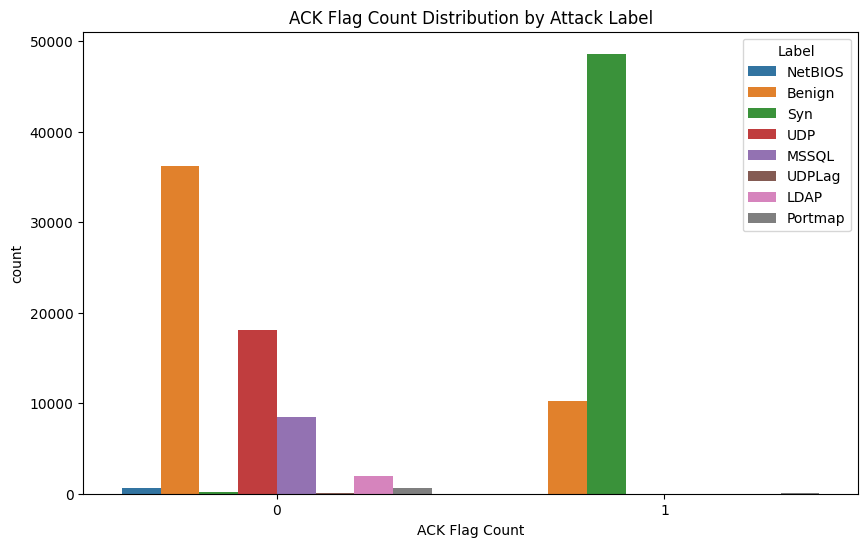

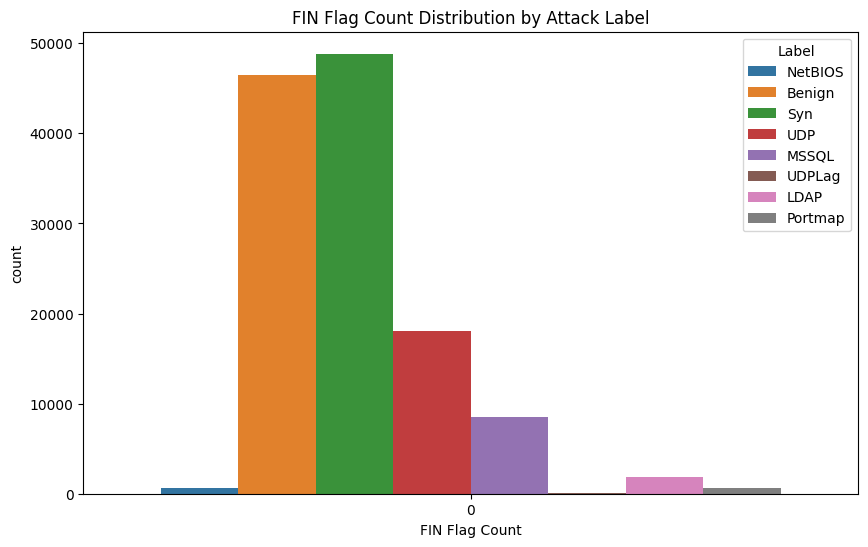

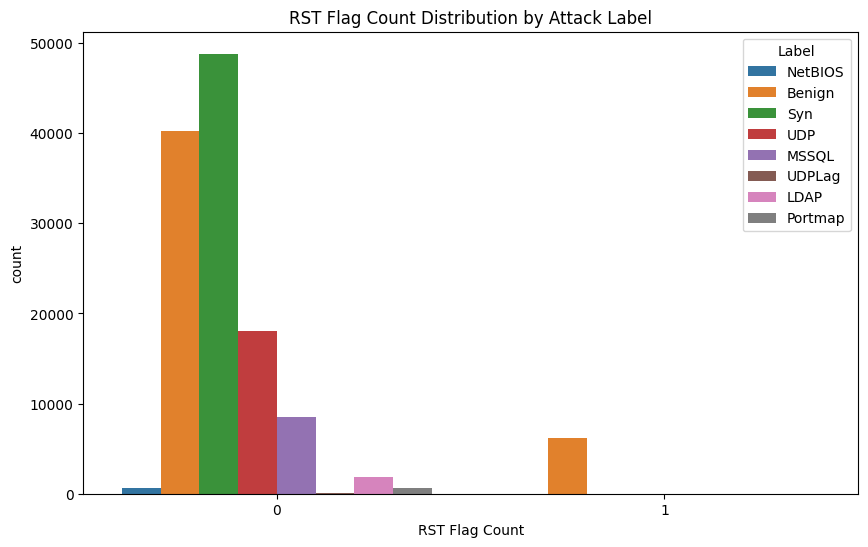

In [ ]:
flag_columns = ['SYN Flag Count', 'ACK Flag Count', 'FIN Flag Count', 'RST Flag Count']

for flag in flag_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=flag, hue='Label', data=train_df)
    plt.title(f'{flag} Distribution by Attack Label')
    plt.show()

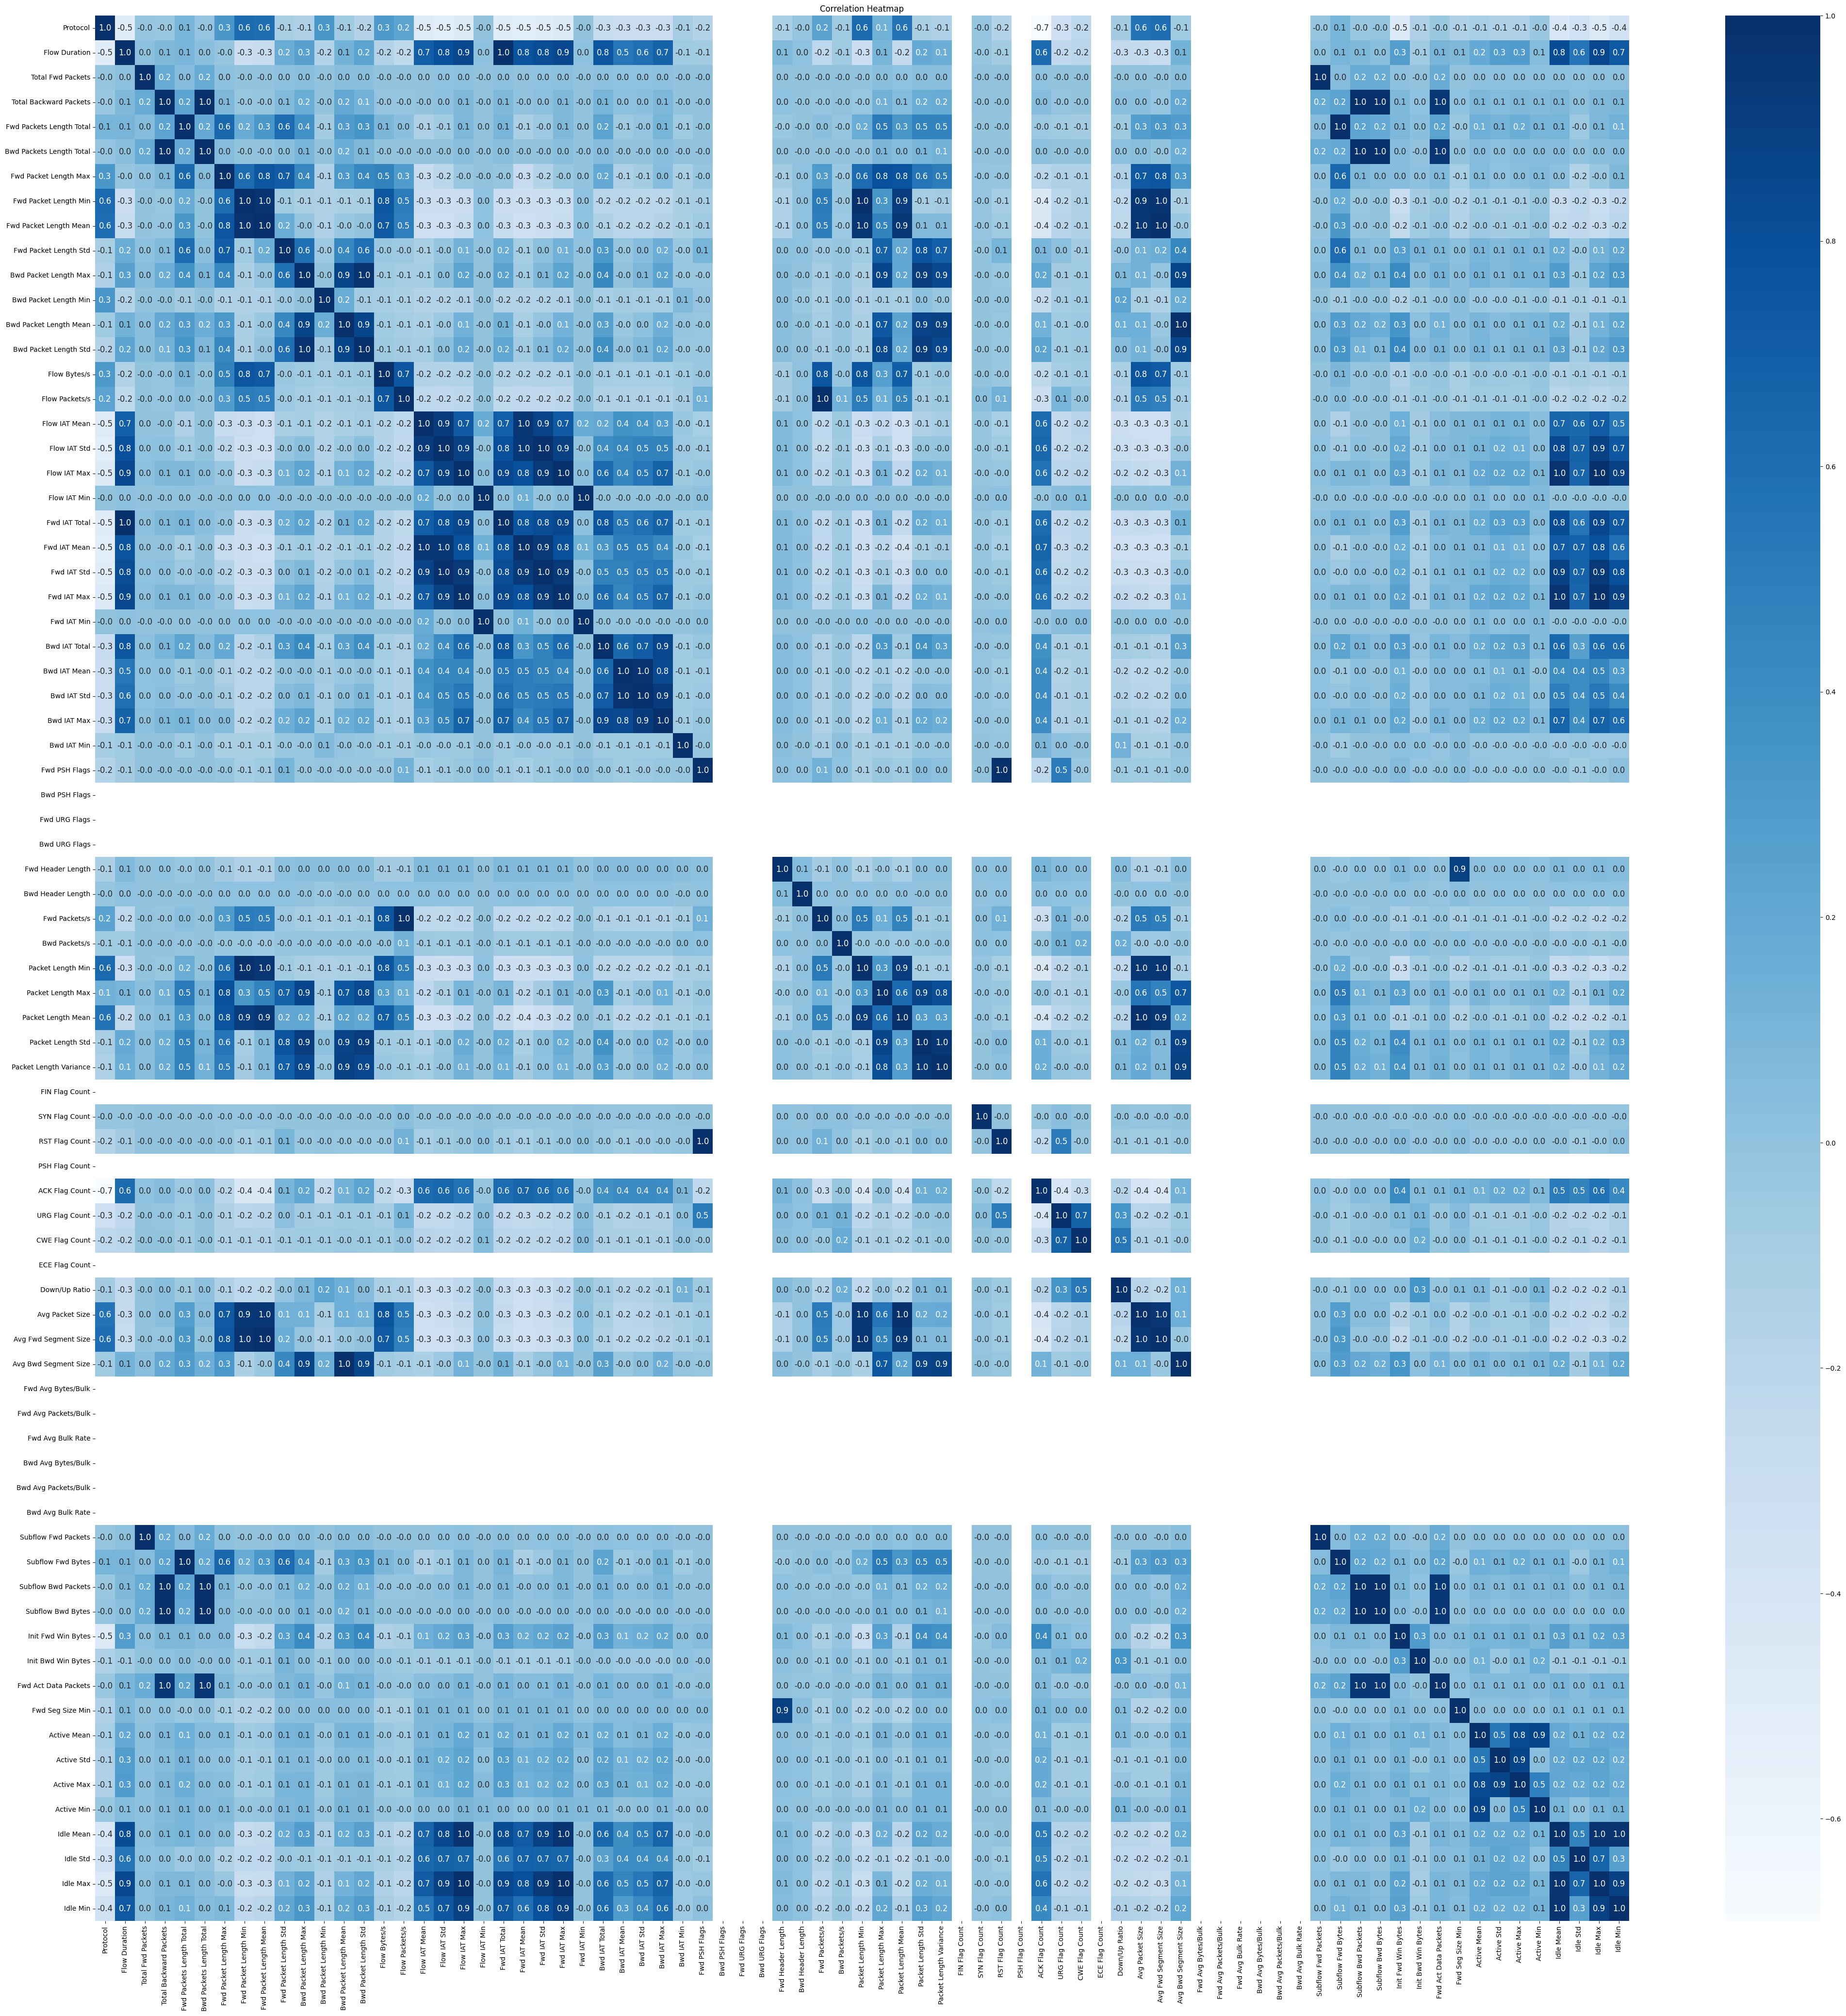

In [ ]:
n_numeric_cols = len(train_df.select_dtypes(include=[np.number]).columns) // 3 * 2
my_heatmap(train_df.select_dtypes(include=[np.number]), size=(n_numeric_cols+1, n_numeric_cols+1))

In [4]:
remove_cols = ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'Fwd Avg Bytes/Bulk',
'Fwd Avg Packets/Bulk',
'Fwd Avg Bulk Rate',
'Bwd Avg Bytes/Bulk',
'Bwd Avg Packets/Bulk',
'Bwd Avg Bulk Rate', 'ECE Flag Count', 'PSH Flag Count']

In [5]:
train_df.drop(remove_cols, axis=1, inplace=True)

In [6]:
numerical_df = train_df.select_dtypes(include=[np.number])

corr_matrix = numerical_df.corr().abs()

mask = np.triu(np.ones(corr_matrix.shape), k=1) == 1

upper_tri = corr_matrix.where(mask)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

numerical_df.drop(to_drop, axis=1, inplace=True)

In [7]:
to_drop

['Bwd Packets Length Total',
 'Fwd Packet Length Mean',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Std',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Fwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'RST Flag Count',
 'Avg Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Fwd Act Data Packets',
 'Fwd Seg Size Min',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Max',
 'Idle Min']

In [8]:
remove_col1 = ['Bwd Packets Length Total',
 'Fwd Packet Length Mean',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Std',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Fwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'RST Flag Count',
 'Avg Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Fwd Act Data Packets',
 'Fwd Seg Size Min',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Max',
 'Idle Min']

In [9]:
train_df.drop(remove_col1, axis=1, inplace=True)

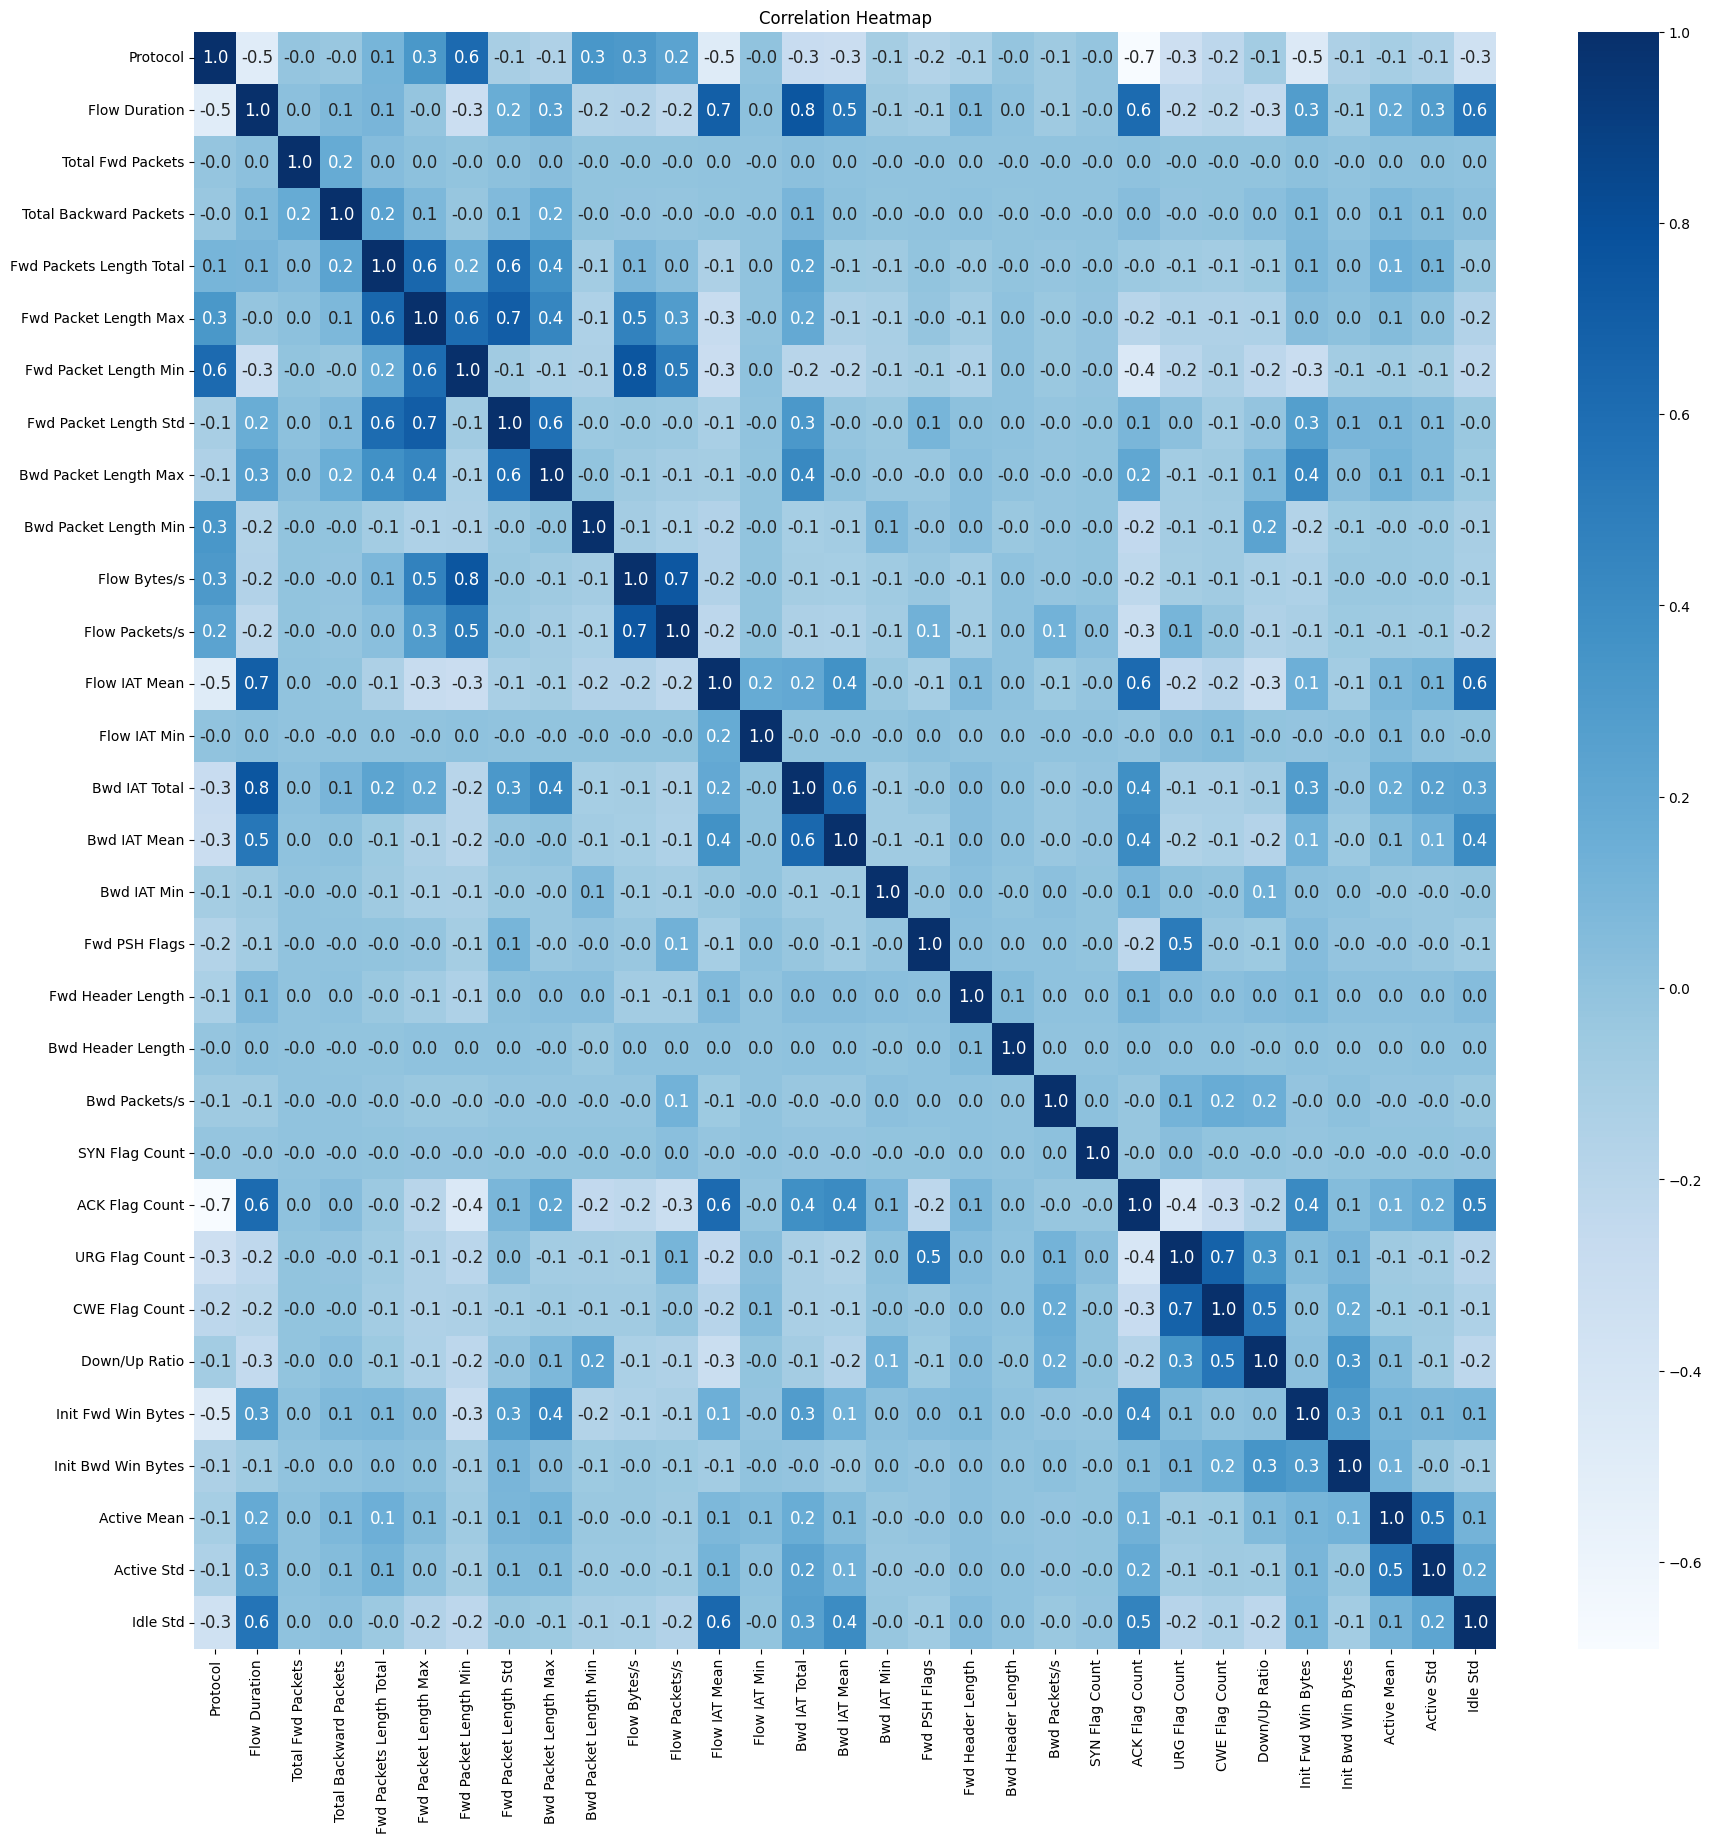

In [ ]:
n_numeric_cols = len(train_df.select_dtypes(include=[np.number]).columns) // 3 * 2
my_heatmap(train_df.select_dtypes(include=[np.number]), size=(n_numeric_cols+1, n_numeric_cols+1))

In [10]:
train_df.head()

Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         6            105                  2                       2   
1         6              1                  2                       0   
2         6       55295858                  8                       0   
3         6             49                  2                       0   
4         6            109                  2                       2   

   Fwd Packets Length Total  Fwd Packet Length Max  Fwd Packet Length Min  \
0                      12.0                    6.0                    6.0   
1                      12.0                    6.0                    6.0   
2                      48.0                    6.0                    6.0   
3                      12.0                    6.0                    6.0   
4                      12.0                    6.0                    6.0   

   Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  ...  \
0                    0.0                    6.0                    6.0  ...   
1                    0.0                    0.0                    0.0  ...   
2                    0.0                    0.0                    0.0  ...   
3                    0.0                    0.0                    0.0  ...   
4                    0.0                    6.0                    6.0  ...   

   ACK Flag Count  URG Flag Count  CWE Flag Count  Down/Up Ratio  \
0               1               0               0            1.0   
1               1               0               0            0.0   
2               1               0               0            0.0   
3               1               0               0            0.0   
4               1               0               0            1.0   

   Init Fwd Win Bytes  Init Bwd Win Bytes  Active Mean  Active Std   Idle Std  \
0                5840                   0          0.0         0.0        0.0   
1                5840                  -1          0.0         0.0        0.0   
2                5840                  -1          1.0         0.0  4641289.0   
3                5840                  -1          0.0         0.0        0.0   
4                5840                   0          0.0         0.0        0.0   

   Label  
0    Syn  
1    Syn  
2    Syn  
3    Syn  
4    Syn  

[5 rows x 32 columns]

In [11]:
test_df.head()

Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0        17              1                  2                       0   
1        17              1                  2                       0   
2        17              1                  2                       0   
3        17              1                  2                       0   
4        17              2                  2                       0   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                     422.0                       0.0                  211.0   
1                     458.0                       0.0                  229.0   
2                     458.0                       0.0                  229.0   
3                     494.0                       0.0                  247.0   
4                     458.0                       0.0                  229.0   

   Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  ...  \
0                  211.0                   211.0                    0.0  ...   
1                  229.0                   229.0                    0.0  ...   
2                  229.0                   229.0                    0.0  ...   
3                  247.0                   247.0                    0.0  ...   
4                  229.0                   229.0                    0.0  ...   

   Fwd Seg Size Min  Active Mean  Active Std  Active Max  Active Min  \
0                20          0.0         0.0         0.0         0.0   
1                 0          0.0         0.0         0.0         0.0   
2                20          0.0         0.0         0.0         0.0   
3                20          0.0         0.0         0.0         0.0   
4                20          0.0         0.0         0.0         0.0   

   Idle Mean  Idle Std  Idle Max  Idle Min          Label  
0        0.0       0.0       0.0       0.0  DrDoS_NetBIOS  
1        0.0       0.0       0.0       0.0  DrDoS_NetBIOS  
2        0.0       0.0       0.0       0.0  DrDoS_NetBIOS  
3        0.0       0.0       0.0       0.0  DrDoS_NetBIOS  
4        0.0       0.0       0.0       0.0  DrDoS_NetBIOS  

[5 rows x 78 columns]

In [12]:
# Проверка размеров
print(f"Train data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Train data shape: (125170, 32)
Test data shape: (306201, 78)


In [13]:
common_columns = train_df.columns.intersection(test_df.columns)
test_df = test_df[common_columns]

In [14]:
train_df.shape

(125170, 32)

In [15]:
test_df.shape

(306201, 32)

In [16]:
# Словарь для группировки меток test_df
label_mapping_test = {
    'DrDoS_UDP': 'UDP',
    'DrDoS_LDAP': 'LDAP',
    'DrDoS_MSSQL': 'MSSQL',
    'DrDoS_NetBIOS': 'NetBIOS',
    'DrDoS_SNMP': 'UDP',  # SNMP использует UDP
    'DrDoS_DNS': 'UDP',   # DNS обычно через UDP
    'DrDoS_NTP': 'UDP',   # NTP-атаки через UDP
    'UDP-lag': 'UDPLag',
    'WebDDoS': 'Syn',     # WebDDoS часто использует SYN-флуд
    'TFTP': 'UDP',        # TFTP работает по UDP
    'Benign': 'Benign',
    'Syn': 'Syn'
}

# Применяем преобразование к test_df
test_df['Label'] = test_df['Label'].map(label_mapping_test)

In [17]:
unique_train_labels = train_df['Label'].unique()
unique_test_labels = test_df['Label'].unique()

unknown_labels = set(unique_test_labels) - set(unique_train_labels)
assert not unknown_labels, f"Тестовая выборка содержит неизвестные классы: {unknown_labels}"

In [18]:
train_df = train_df[train_df["Label"] != "Portmap"]

In [19]:
train_df['Label'].unique()

array(['Syn', 'Benign', 'UDP', 'UDPLag', 'MSSQL', 'LDAP', 'NetBIOS'],
      dtype=object)

In [20]:
test_df['Label'].unique()

array(['NetBIOS', 'Benign', 'UDP', 'UDPLag', 'Syn', 'MSSQL', 'LDAP'],
      dtype=object)

In [21]:
import pandas as pd

# Для train_df
train_class_distribution = train_df['Label'].value_counts().sort_values(ascending=False)
print("Распределение классов в train_df:\n", train_class_distribution)

# Для test_df
test_class_distribution = test_df['Label'].value_counts().sort_values(ascending=False)
print("\nРаспределение классов в test_df:\n", test_class_distribution)

Распределение классов в train_df:
 Label
Syn        48840
Benign     46427
UDP        18090
MSSQL       8523
LDAP        1906
NetBIOS      644
UDPLag        55
Name: count, dtype: int64

Распределение классов в test_df:
 Label
UDP        237091
Benign      51404
UDPLag       8872
MSSQL        6212
LDAP         1440
NetBIOS       598
Syn           584
Name: count, dtype: int64


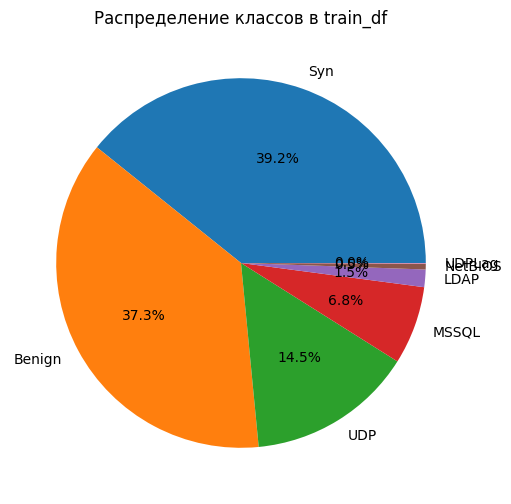

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
train_df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Распределение классов в train_df")
plt.ylabel("")
plt.show()

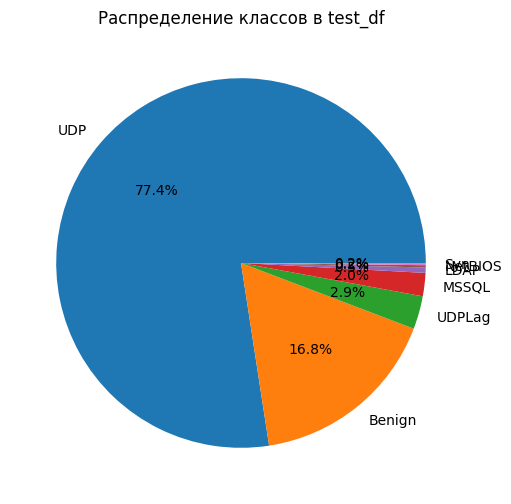

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
test_df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Распределение классов в test_df")
plt.ylabel("")
plt.show()

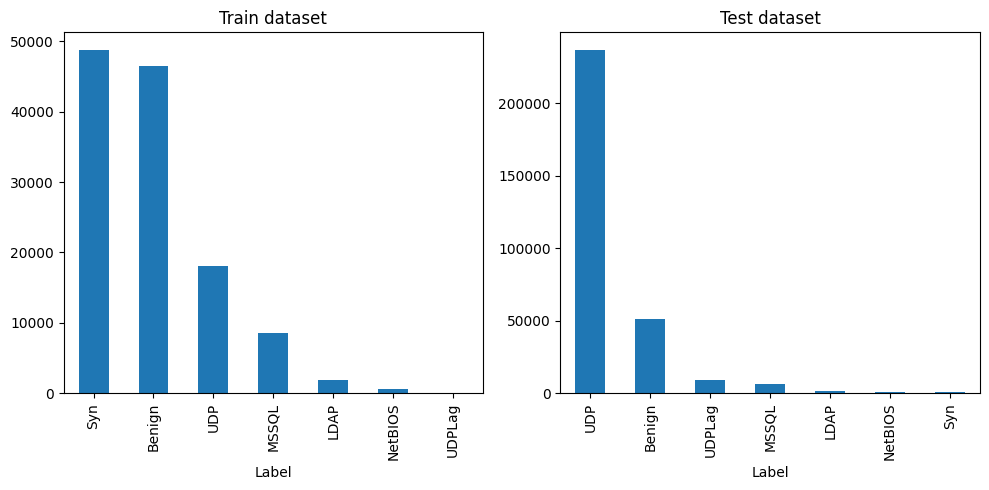

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
train_class_distribution.plot(kind='bar')
plt.title("Train dataset")

plt.subplot(1, 2, 2)
test_class_distribution.plot(kind='bar')
plt.title("Test dataset")

plt.tight_layout()
plt.show()

In [22]:
max_class_count = train_class_distribution.max()
min_class_count = train_class_distribution.min()
imbalance_ratio = max_class_count / min_class_count

print(f"\nКоэффициент дисбаланса: {imbalance_ratio:.2f}")


Коэффициент дисбаланса: 888.00


In [23]:
# 1. Объединяем исходные данные
full_data = pd.concat([train_df, test_df], ignore_index=True)

# 2. Стратифицированное разделение
train_df_new, test_df_new = train_test_split(
    full_data,
    test_size=0.2,
    stratify=full_data['Label'],  # Стратификация по оригинальным меткам
    random_state=42
)

# 3. Теперь ПЕРЕЗАПИСЫВАЕМ оригинальные данные
train_df = train_df_new.copy()
test_df = test_df_new.copy()

# 4. Кодируем метки в числовой формат (уже в новых данных)
le = LabelEncoder()
train_df['Label_encoded'] = le.fit_transform(train_df['Label'])
test_df['Label_encoded'] = le.transform(test_df['Label'])

# Проверяем распределение
print("Train распределение:\n", train_df['Label'].value_counts())
print("\nTest распределение:\n", test_df['Label'].value_counts())

# Проверяем соответствие
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Соответствие меток и чисел:\n", label_mapping)

Train распределение:
 Label
UDP        204144
Benign      78265
Syn         39539
MSSQL       11788
UDPLag       7141
LDAP         2677
NetBIOS       994
Name: count, dtype: int64

Test распределение:
 Label
UDP        51037
Benign     19566
Syn         9885
MSSQL       2947
UDPLag      1786
LDAP         669
NetBIOS      248
Name: count, dtype: int64
Соответствие меток и чисел:
 {'Benign': 0, 'LDAP': 1, 'MSSQL': 2, 'NetBIOS': 3, 'Syn': 4, 'UDP': 5, 'UDPLag': 6}


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from collections import Counter

def prepare_data(train_df, test_df):
    """Подготовка данных с гарантированным наличием всех классов"""
    # Объединяем редкие классы
    rare_classes = ['NetBIOS', 'LDAP']
    train_df['Label'] = train_df['Label'].replace({k: 'RARE' for k in rare_classes})
    test_df['Label'] = test_df['Label'].replace({k: 'RARE' for k in rare_classes})

    # Фиксируем кодировщик на train данных
    le = LabelEncoder()
    le.fit(train_df['Label'])

    # Кодируем метки
    train_df['Label_encoded'] = le.transform(train_df['Label'])
    test_df['Label_encoded'] = le.transform(test_df['Label'])

    return train_df, test_df, le

def analyze_classes(df, le):
    """Анализ распределения классов"""
    print("\nДетальное распределение:")
    for cls_code, cls_name in enumerate(le.classes_):
        count = sum(df['Label_encoded'] == cls_code)
        print(f"{cls_name} (код {cls_code}): {count} примеров")

def safe_smote_balance(train_df, le, min_samples=50):
    """Безопасная балансировка с проверкой условий"""
    # Выделяем фичи и таргет
    X = train_df.drop(['Label', 'Label_encoded'], axis=1)
    y = train_df['Label_encoded']

    # Анализируем классы перед балансировкой
    analyze_classes(train_df, le)

    # Определяем стратегию увеличения только для минорных классов
    strategy = {}
    for cls in np.unique(y):
        count = sum(y == cls)
        if count < min_samples:
            continue  # Пропускаем слишком малочисленные классы
        target_size = min(count * 3, 50000)  # Увеличиваем не более чем в 3 раза
        strategy[cls] = target_size

    if not strategy:
        print("\nНет классов для балансировки!")
        return train_df

    print("\nСтратегия балансировки:", {le.classes_[k]:v for k,v in strategy.items()})

    # Применяем SMOTE
    try:
        smote = SMOTE(sampling_strategy=strategy, k_neighbors=2)
        X_res, y_res = smote.fit_resample(X, y)
        return pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res, columns=['Label_encoded'])], axis=1)
    except ValueError as e:
        print(f"\nОшибка балансировки: {e}")
        print("Возвращаем оригинальные данные")
        return train_df

def train_and_validate(train_df, test_df, le):
    """Обучение модели с контролем качества"""
    # Инициализация модели
    task = Task('multiclass', metric='f1_weighted')

    automl = TabularAutoML(
        task=task,
        timeout=3600,
        cpu_limit=4,
        general_params={
            'use_algos': [['lgb', 'cb']],
            'nn_params': {'use_qt': False}
        }
    )

    # Обучение
    roles = {'target': 'Label_encoded'}
    automl.fit_predict(train_df, roles=roles)

    # Проверка наличия всех классов в тесте
    test_classes = set(test_df['Label_encoded'].unique())
    train_classes = set(train_df['Label_encoded'].unique())
    missing_classes = test_classes - train_classes

    if missing_classes:
        print(f"\nПредупреждение: В тесте есть классы, отсутствующие в трейне: {missing_classes}")
        test_df = test_df[~test_df['Label_encoded'].isin(missing_classes)]

    # Предсказание и оценка
    if not test_df.empty:
        test_pred = automl.predict(test_df)
        print("\nОтчёт о классификации:")
        print(classification_report(
            test_df['Label_encoded'],
            test_pred.data.argmax(axis=1),
            target_names=le.classes_,
            digits=4
        ))
    else:
        print("\nТестовые данные не содержат известных классов!")

    return automl

# Главная функция
def main_pipeline(train_df, test_df):
    """Полный пайплайн обработки"""
    # 1. Подготовка данных
    train_df, test_df, le = prepare_data(train_df.copy(), test_df.copy())

    # 2. Балансировка
    balanced_train = safe_smote_balance(train_df, le)

    # 3. Обучение и валидация
    model = train_and_validate(balanced_train, test_df, le)

    return model, le

# Запуск
automl_model, label_encoder = main_pipeline(train_df, test_df)

/usr/local/lib/python3.11/dist-packages/lightautoml/transformers/text.py:22: UserWarning: 'gensim' - package isn't installed
  warnings.warn("'gensim' - package isn't installed")



Детальное распределение:
Benign (код 0): 78265 примеров
MSSQL (код 1): 11788 примеров
RARE (код 2): 3671 примеров
Syn (код 3): 39539 примеров
UDP (код 4): 204144 примеров
UDPLag (код 5): 7141 примеров


INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: multiclass

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 3600.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (344548, 33)




Стратегия балансировки: {'Benign': 50000, 'MSSQL': 35364, 'RARE': 11013, 'Syn': 50000, 'UDP': 50000, 'UDPLag': 21423}

Ошибка балансировки: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 78265 samples and 50000 samples are asked.
Возвращаем оригинальные данные


INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 3572.89 secs
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's multi_logloss: 0.0470007	valid's Opt metric: 0.982365
INFO3:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[66]	valid's multi_logloss: 0.0562263	valid's Opt metric: 0.982504
INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 244, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_dat


Отчёт о классификации:
              precision    recall  f1-score   support

      Benign     0.9972    0.9995    0.9984     19566
       MSSQL     0.8866    0.9630    0.9232      2947
        RARE     0.7038    0.7023    0.7031       917
         Syn     0.9983    0.9923    0.9953      9885
         UDP     0.9857    0.9878    0.9867     51037
      UDPLag     0.9319    0.7514    0.8320      1786

    accuracy                         0.9822     86138
   macro avg     0.9173    0.8994    0.9064     86138
weighted avg     0.9822    0.9822    0.9819     86138



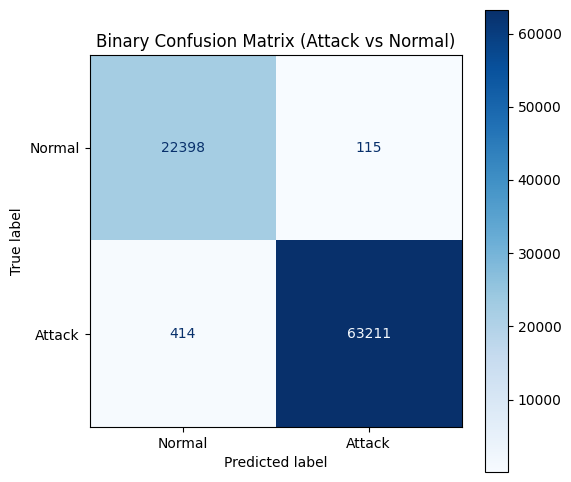

Нормальные соединения правильно классифицированы: 22398
Нормальные соединения ошибочно приняты за атаки: 115
Атаки пропущены (ложная норма): 414
Атаки правильно обнаружены: 63211


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Определяем, какие метки считать атаками
attack_labels = ['Syn', 'UDP', 'UDPLag', 'NetBIOS', 'LDAP', 'RARE']

# Создаем бинарные метки
test_df['is_attack'] = test_df['Label'].isin(attack_labels)
y_true_binary = test_df['is_attack']

# Получаем прогнозы модели
test_pred = automl_model.predict(test_df)
y_pred_labels = [label_encoder.classes_[i] for i in test_pred.data.argmax(axis=1)]
y_pred_binary = pd.Series(y_pred_labels).isin(attack_labels)

# Строим матрицу ошибок
cm = confusion_matrix(y_true_binary, y_pred_binary)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Normal', 'Attack']
)

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Binary Confusion Matrix (Attack vs Normal)")
plt.grid(False)
plt.show()

# Выводим текстовый отчёт
tn, fp, fn, tp = cm.ravel()
print(f"Нормальные соединения правильно классифицированы: {tn}")
print(f"Нормальные соединения ошибочно приняты за атаки: {fp}")
print(f"Атаки пропущены (ложная норма): {fn}")
print(f"Атаки правильно обнаружены: {tp}")

In [29]:
def prepare_data(train_df, test_df):
    """Подготовка данных с одинаковым набором признаков"""
    # Удаляем лишние колонки если они есть
    for df in [train_df, test_df]:
        if 'is_attack' in df.columns:
            df.drop('is_attack', axis=1, inplace=True, errors='ignore')

    # Объединяем редкие классы
    rare_classes = ['NetBIOS', 'LDAP']
    train_df['Label'] = train_df['Label'].replace({k: 'RARE' for k in rare_classes})
    test_df['Label'] = test_df['Label'].replace({k: 'RARE' for k in rare_classes})

    # Фиксируем кодировщик
    le = LabelEncoder()
    le.fit(train_df['Label'])

    # Кодируем метки
    train_df['Label_encoded'] = le.transform(train_df['Label'])
    test_df['Label_encoded'] = le.transform(test_df['Label'])

    return train_df, test_df, le

def balance_data(train_df, le):
    """Балансировка с гарантией одинаковых признаков"""
    features = train_df.drop(['Label', 'Label_encoded'], axis=1).columns
    X = train_df[features]  # Явный выбор колонок
    y = train_df['Label_encoded']

    class_counts = Counter(y)
    strategy = {
        cls: min(count * 2, 50000)
        for cls, count in class_counts.items()
        if count < 30000
    }

    if strategy:
        smote = SMOTE(sampling_strategy=strategy, k_neighbors=3)
        X, y = smote.fit_resample(X, y)

    return X, y

def train_boosting(X_train, y_train, model_type='xgb'):
    """Обучение с фиксированными feature_names"""
    model = XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.1,
        objective='multi:softmax',
        random_state=42
    ) if model_type == 'xgb' else CatBoostClassifier(
        iterations=500,
        depth=6,
        learning_rate=0.1,
        loss_function='MultiClass',
        verbose=0,
        random_state=42
    ) if model_type == 'catboost' else LGBMClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.1,
        objective='multiclass',
        random_state=42
    )

    model.fit(X_train, y_train)
    return model, X_train.columns.tolist()  # Возвращаем имена фичей

def boosting_pipeline(train_df, test_df, model_type='xgb'):
    # 1. Подготовка
    train_df, test_df, le = prepare_data(train_df, test_df)

    # 2. Балансировка
    X_train, y_train = balance_data(train_df, le)

    # 3. Обучение
    model, feature_names = train_boosting(X_train, y_train, model_type)

    # 4. Предсказание с проверкой фичей
    X_test = test_df[feature_names]  # Только нужные колонки
    y_test = test_df['Label_encoded']
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, target_names=le.classes_, digits=4))
    return model, le

# Запуск
model, label_encoder = boosting_pipeline(train_df.copy(), test_df.copy(), model_type='xgb')

              precision    recall  f1-score   support

      Benign     0.9988    0.9994    0.9991     19566
       MSSQL     0.8700    0.9610    0.9133      2947
        RARE     0.6362    0.7437    0.6858       917
         Syn     0.9972    0.9927    0.9949      9885
         UDP     0.9881    0.9819    0.9850     51037
      UDPLag     0.8482    0.7979    0.8223      1786

    accuracy                         0.9800     86138
   macro avg     0.8898    0.9128    0.9001     86138
weighted avg     0.9809    0.9800    0.9803     86138



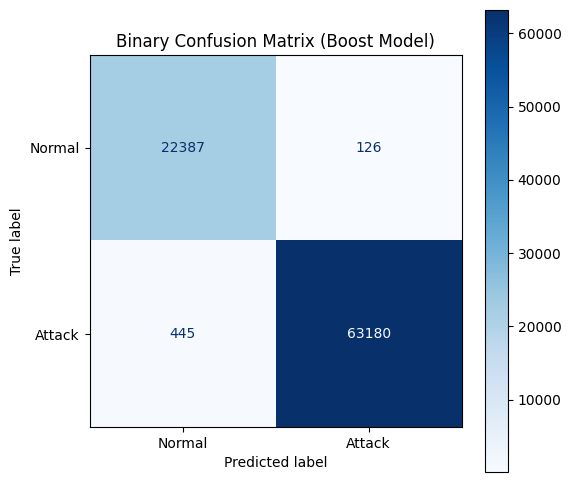


Результаты обнаружения атак:
Правильно классифицировано нормальных соединений (TN): 22387
Ложные срабатывания (FP): 126
Пропущенные атаки (FN): 445
Правильно обнаруженные атаки (TP): 63180


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 1. Подготовка бинарных меток ###
attack_labels = ['Syn', 'UDP', 'UDPLag', 'NetBIOS', 'LDAP', 'RARE']

# Истинные метки
test_df['is_attack'] = test_df['Label'].isin(attack_labels)
y_true_binary = test_df['is_attack']

### 2. Получение предсказаний ###
# Важно: используем те же фичи, что и при обучении
X_test = test_df.drop(['Label', 'Label_encoded', 'is_attack'], axis=1, errors='ignore')
X_test = X_test[model.feature_names_in_]  # Гарантируем совпадение признаков

# Прогнозы модели
y_pred = model.predict(X_test)
y_pred_labels = [label_encoder.classes_[i] for i in y_pred]
y_pred_binary = pd.Series(y_pred_labels).isin(attack_labels)

### 3. Построение матрицы ошибок ###
cm = confusion_matrix(y_true_binary, y_pred_binary)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Normal', 'Attack']
)

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Binary Confusion Matrix (Boost Model)")
plt.grid(False)
plt.show()

### 4. Текстовый отчет ###
tn, fp, fn, tp = cm.ravel()
print("\nРезультаты обнаружения атак:")
print(f"Правильно классифицировано нормальных соединений (TN): {tn}")
print(f"Ложные срабатывания (FP): {fp}")
print(f"Пропущенные атаки (FN): {fn}")
print(f"Правильно обнаруженные атаки (TP): {tp}")

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from autogluon.tabular import TabularPredictor
from collections import Counter

### 1. Подготовка данных ###
def prepare_data(train_df, test_df):
    """Подготовка данных с одинаковым набором признаков"""
    # Удаляем лишние колонки если они есть
    for df in [train_df, test_df]:
        if 'is_attack' in df.columns:
            df.drop('is_attack', axis=1, inplace=True, errors='ignore')

    # Объединяем редкие классы
    rare_classes = ['NetBIOS', 'LDAP']
    train_df['Label'] = train_df['Label'].replace({k: 'RARE' for k in rare_classes})
    test_df['Label'] = test_df['Label'].replace({k: 'RARE' for k in rare_classes})

    # Фиксируем кодировщик
    le = LabelEncoder()
    le.fit(train_df['Label'])

    # Кодируем метки
    train_df['Label_encoded'] = le.transform(train_df['Label'])
    test_df['Label_encoded'] = le.transform(test_df['Label'])

    return train_df, test_df, le

### 2. Балансировка данных ###
def balance_data(train_df, le):
    """Балансировка с гарантией одинаковых признаков"""
    features = train_df.drop(['Label', 'Label_encoded'], axis=1).columns
    X = train_df[features]
    y = train_df['Label_encoded']

    class_counts = Counter(y)
    strategy = {
        cls: min(count * 2, 50000)
        for cls, count in class_counts.items()
        if count < 30000
    }

    if strategy:
        smote = SMOTE(sampling_strategy=strategy, k_neighbors=3)
        X, y = smote.fit_resample(X, y)

    balanced_data = pd.DataFrame(X)
    balanced_data['Label_encoded'] = y
    return balanced_data

### 3. Обучение AutoGluon ###
def train_autogluon(train_data, time_limit=3600):
    """Настройка и обучение AutoGluon"""
    predictor = TabularPredictor(
        label='Label_encoded',
        problem_type='multiclass',
        eval_metric='f1_weighted'
    ).fit(
        train_data,
        presets='best_quality',
        time_limit=time_limit,
        hyperparameters={
            'GBM': [
                {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
                {},
            ],
            'CAT': {},
            'XGB': {},
            'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini'}}],
        }
    )
    return predictor

### 4. Основной пайплайн ###
def autogluon_pipeline(train_df, test_df, time_limit=3600):
    # 1. Подготовка данных
    train_df, test_df, le = prepare_data(train_df, test_df)

    # 2. Балансировка
    balanced_train = balance_data(train_df, le)

    # 3. Обучение
    predictor = train_autogluon(balanced_train, time_limit)

    # 4. Предсказание
    X_test = test_df.drop(['Label', 'Label_encoded'], axis=1, errors='ignore')
    y_test = test_df['Label_encoded']
    y_pred = predictor.predict(X_test)

    # 5. Отчет
    print("Лучшие модели:")
    print(predictor.leaderboard())

    print("\nClassification Report:")
    print(predictor.evaluate_predictions(
        y_true=y_test,
        y_pred=y_pred,
        auxiliary_metrics=True
    ))

    return predictor, le

### Запуск ###
predictor, label_encoder = autogluon_pipeline(train_df.copy(), test_df.copy(), time_limit=3600)

No path specified. Models will be saved in: "AutogluonModels/ag-20250415_134942"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       8.88 GB / 12.67 GB (70.1%)
Disk Space Avail:   59.45 GB / 107.72 GB (55.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

Лучшие модели:
                 model  score_val  eval_metric  pred_time_val     fit_time  \
0  WeightedEnsemble_L3   0.977380  f1_weighted     398.761966  2589.938432   
1    LightGBMXT_BAG_L2   0.977196  f1_weighted     396.372922  2473.011589   
2      LightGBM_BAG_L2   0.976874  f1_weighted     306.849205  1811.531393   
3  WeightedEnsemble_L2   0.976547  f1_weighted     304.798729  1726.018458   
4      LightGBM_BAG_L1   0.976491  f1_weighted       8.691823   160.316159   
5    LightGBMXT_BAG_L1   0.975297  f1_weighted     295.937834  1555.296156   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.169495          21.007765            3       True   
1               91.743265         757.399274            2       True   
2                2.219549          95.919078            2       True   
3                0.169073          10.406143            2       True   
4                8.691823         160.316159            1       True   
5     

<Figure size 600x600 with 0 Axes>

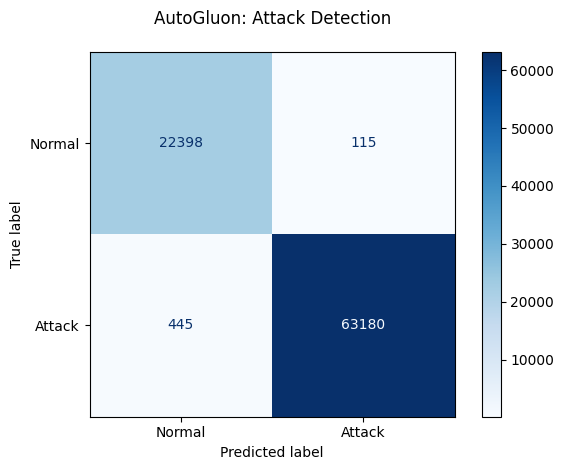


Точность (Precision): 0.998
Полнота (Recall): 0.993
F1-score: 0.996

[Normal] Правильно: 22398 | Ошибки: 115
[Attack] Правильно: 63180 | Ошибки: 445


In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Определяем атаки
attack_labels = ['Syn', 'UDP', 'UDPLag', 'NetBIOS', 'LDAP', 'RARE']

# 2. Готовим данные
test_df['True_Attack'] = test_df['Label'].isin(attack_labels)
predictions = predictor.predict(test_df.drop(['Label', 'Label_encoded'], axis=1, errors='ignore'))
test_df['Pred_Attack'] = [label_encoder.classes_[i] in attack_labels for i in predictions]

# 3. Строим матрицу
cm = confusion_matrix(test_df['True_Attack'], test_df['Pred_Attack'])
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Attack'])

plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title('AutoGluon: Attack Detection', pad=20)
plt.grid(False)
plt.tight_layout()
plt.show()

# 4. Выводим метрики
tn, fp, fn, tp = cm.ravel()
print(f"\nТочность (Precision): {tp/(tp+fp):.3f}")
print(f"Полнота (Recall): {tp/(tp+fn):.3f}")
print(f"F1-score: {2*tp/(2*tp+fp+fn):.3f}\n")
print(f"[Normal] Правильно: {tn} | Ошибки: {fp}")
print(f"[Attack] Правильно: {tp} | Ошибки: {fn}")